# Problem Statement:-

Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.

# Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print("All libraries are loaded succesfully")

All libraries are loaded succesfully


In [2]:
df = pd.read_csv("insurance.csv")
print("Instruction Claims Fraud Detection data loaded succesfully")

Instruction Claims Fraud Detection data loaded succesfully


In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
pd.set_option('display.max_columns',None)

In [5]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,FEMALE,Associate,sales,kayaking,husband,0,0,26-02-2015,Parked Car,?,Minor Damage,Police,WV,Columbus,1416 Cherokee Ridge,6,1,?,0,3,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [6]:
df.shape

(1000, 40)

So, there is 1000 rows and 40 columns in the dataset.

# Label in Datasets

In [7]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

Target column:- fraud_reported
    
rest all are feature column.

# Exploratory Data Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [9]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

target variable is categorical(object data types)

In [10]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

there is null values in the dataset only only in _c39 column i.e - 1000(whole column is empty)

<AxesSubplot:>

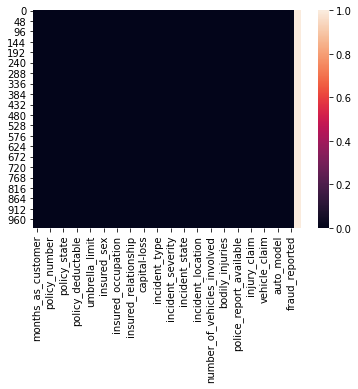

In [11]:
sns.heatmap(df.isnull())

_c39 doesn't have any data in it therfore we will drop this column.

In [12]:
df.drop(['_c39'],axis=1,inplace=True)

In [13]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

now there is no null values present in the dataset.

In [14]:
df.shape

(1000, 39)

In [15]:
print("Unique values of each columns with counts-")
for i in df.columns:
    print(i,'=')
    print(df[i].value_counts())
    print('\n')

Unique values of each columns with counts-
months_as_customer =
194    8
285    7
140    7
230    7
128    7
      ..
347    1
113    1
337    1
117    1
0      1
Name: months_as_customer, Length: 391, dtype: int64


age =
43    49
39    48
41    45
34    44
30    42
31    42
38    42
37    41
33    39
32    38
40    38
29    35
46    33
35    32
36    32
42    32
44    32
28    30
45    26
26    26
48    25
47    24
27    24
57    16
25    14
49    14
55    14
50    13
53    13
61    10
24    10
54    10
60     9
51     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
22     1
20     1
19     1
Name: age, dtype: int64


policy_number =
116735    1
107181    1
430794    1
115399    1
328387    1
         ..
218456    1
179538    1
357713    1
247116    1
296960    1
Name: policy_number, Length: 1000, dtype: int64


policy_bind_date =
28-04-1992    3
01-01-2006    3
05-08-1992    3
20-07-1991    2
28-12-1991    2
             ..
13-10-1991    1
14-04-19

In [16]:
#Checking unique values in each column-
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

All the policy number, incident locations are having different data and also policy_bind_date,policy_annual_premium & insured_zip are having maximum no. of different data.

Since, they are all unique for each row. we can remove these columns

In [17]:
df.drop(columns=['policy_number','incident_location'],inplace=True)

dropping the following columns as as they are unrelevant because most of the rows have unique values.

In [18]:
df.drop(columns=['insured_zip','policy_bind_date','policy_annual_premium'],axis=1,inplace=True)

In [19]:
df.shape

(1000, 34)

# Data Visualization

N    753
Y    247
Name: fraud_reported, dtype: int64

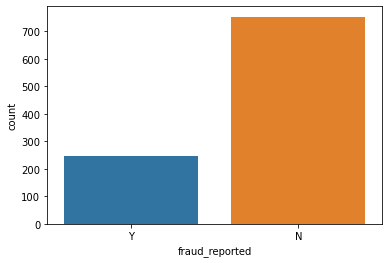

In [20]:
sns.countplot(df['fraud_reported'])
df['fraud_reported'].value_counts()

24.7% of claims were found as fraud out of 100%

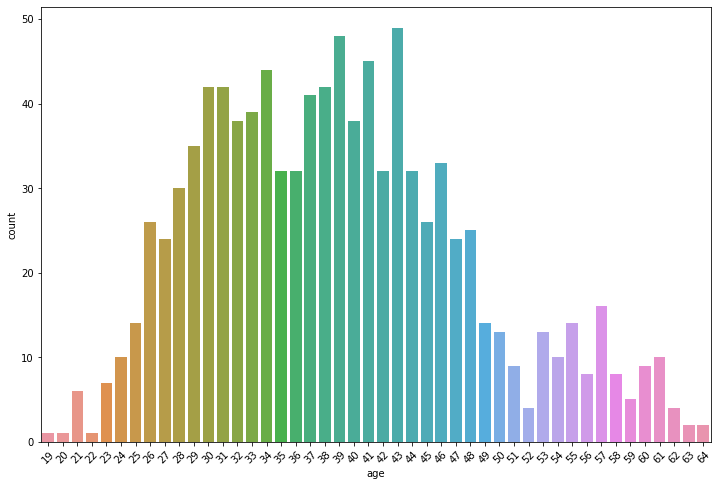

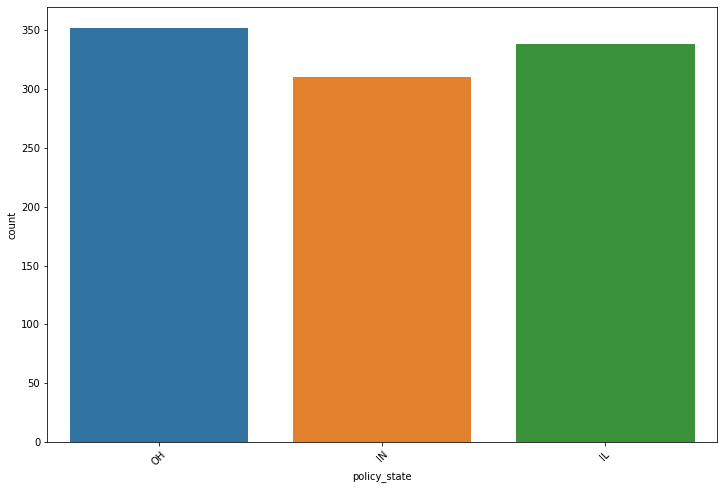

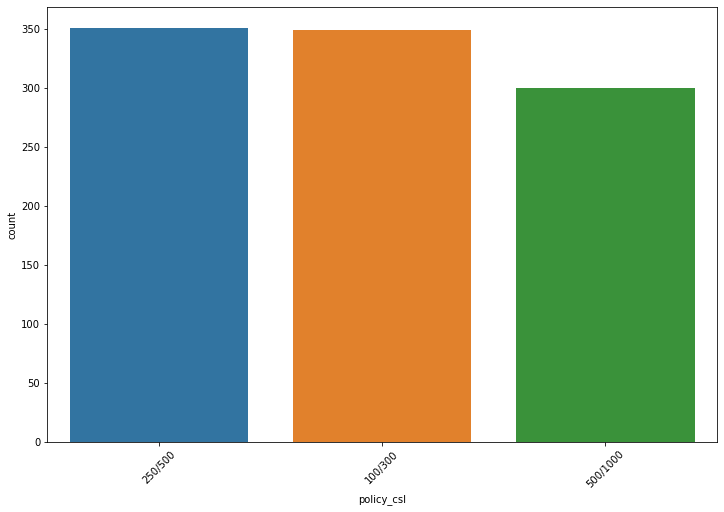

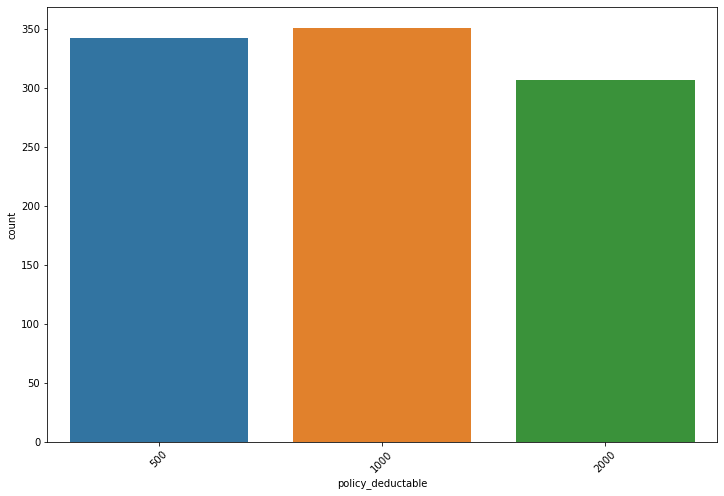

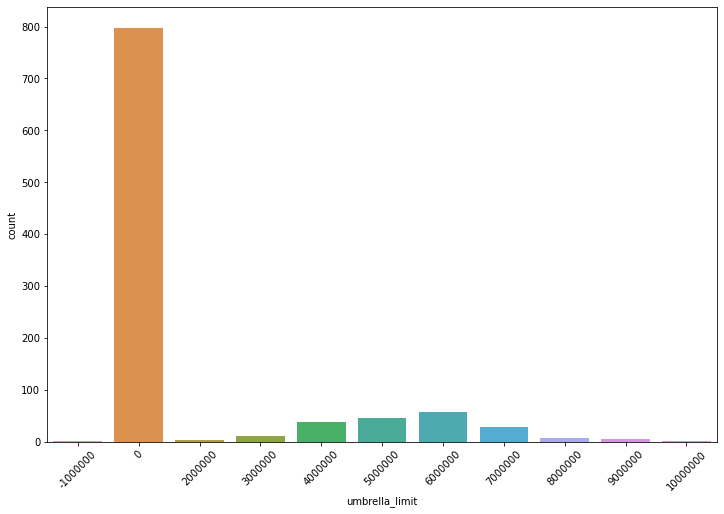

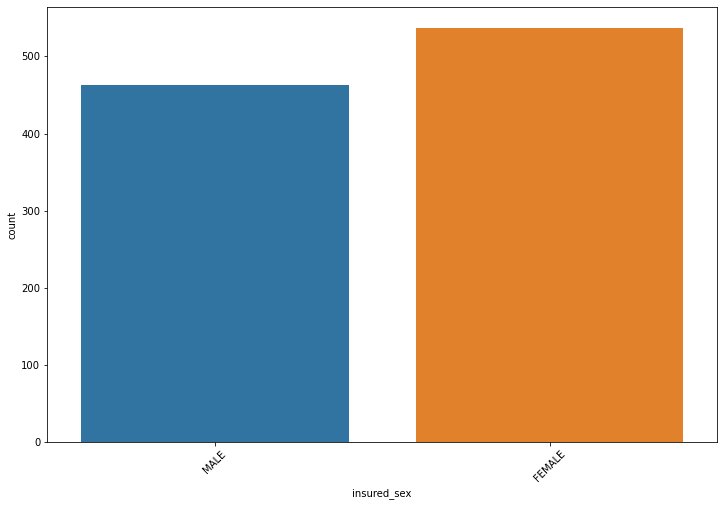

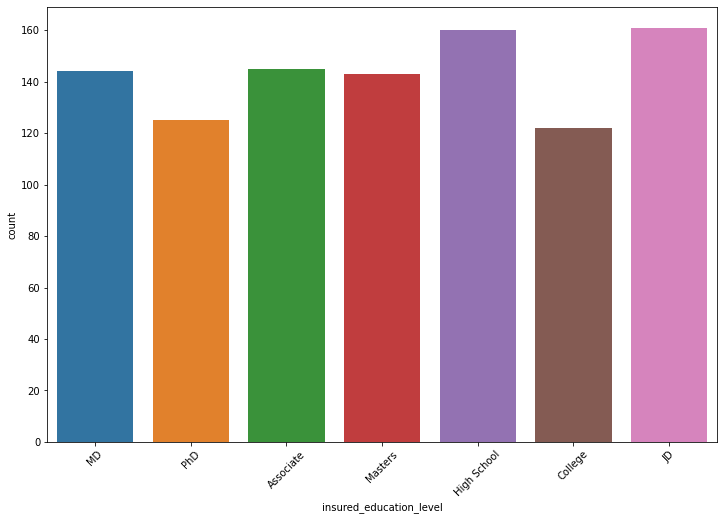

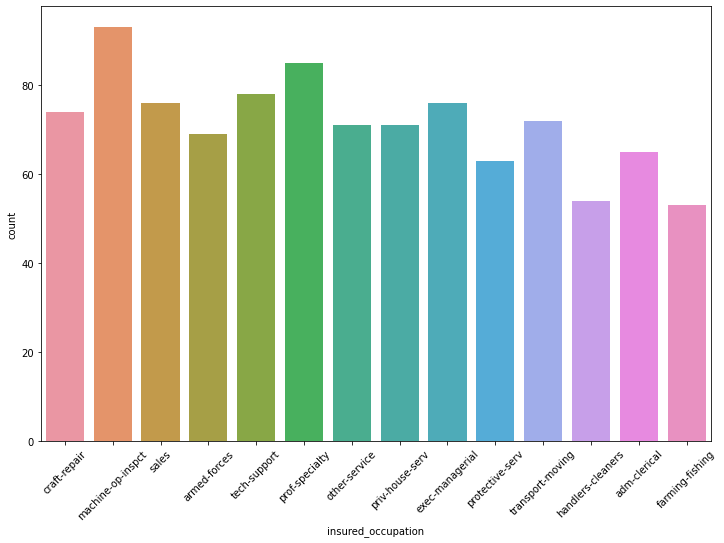

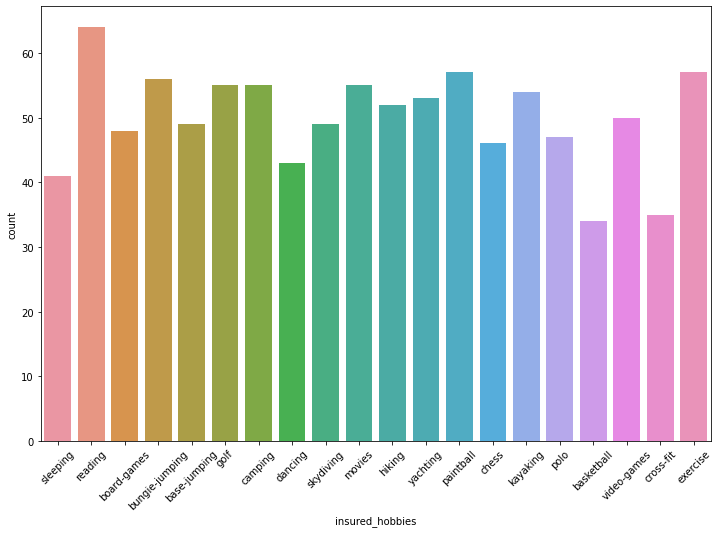

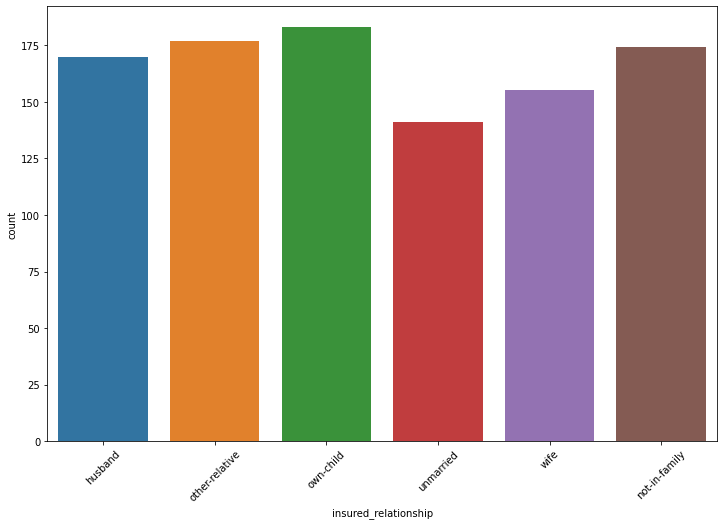

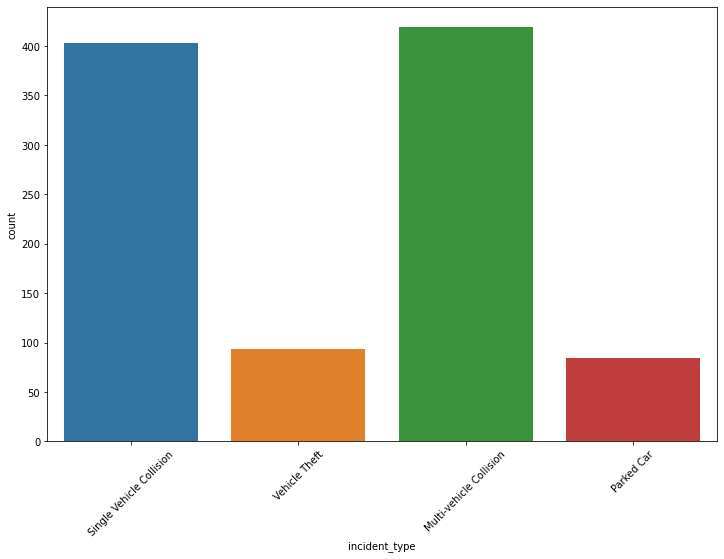

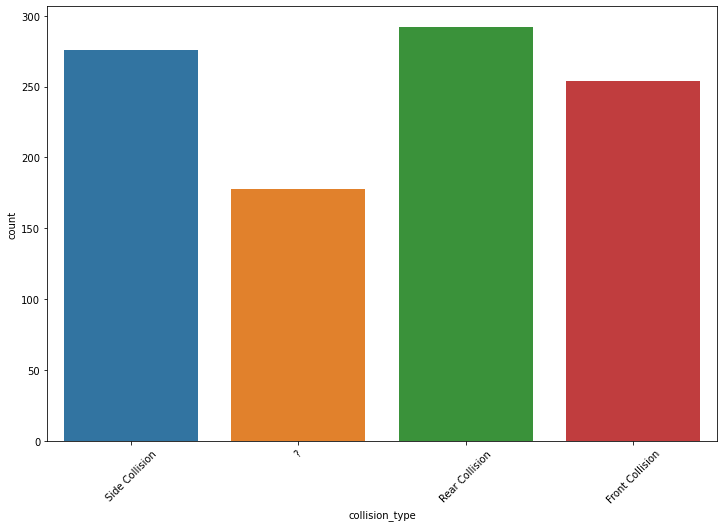

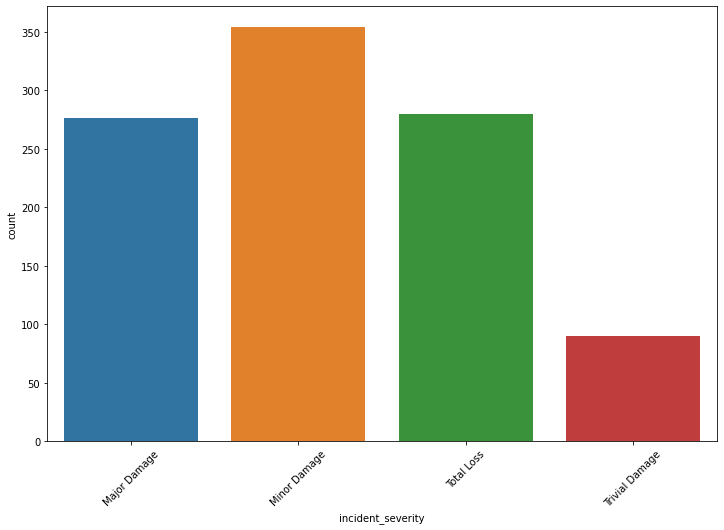

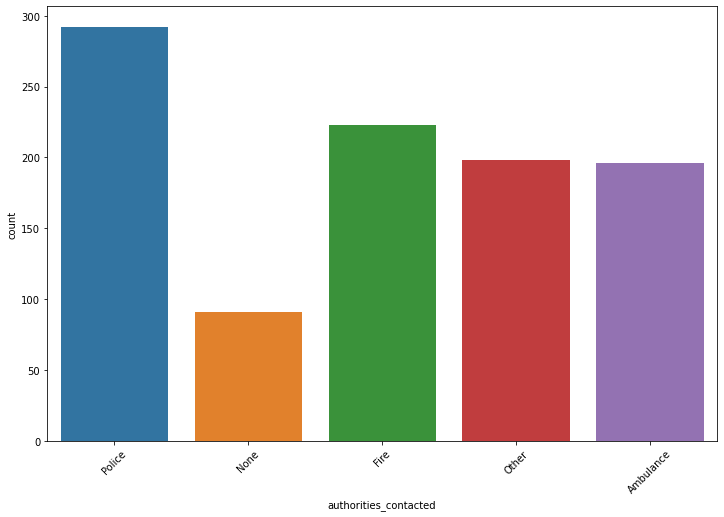

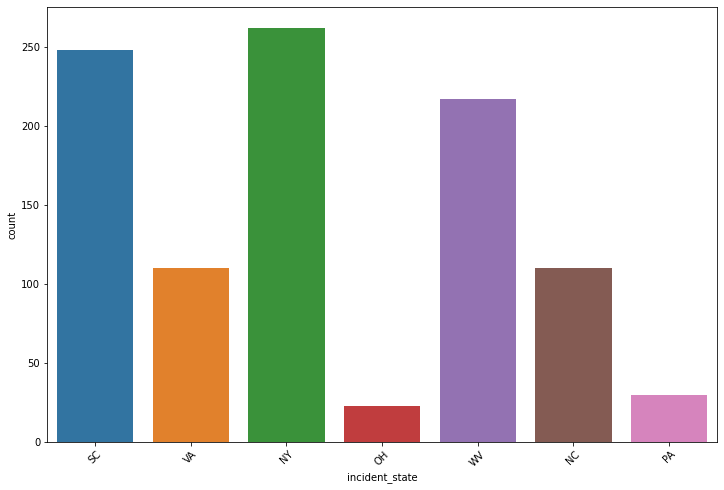

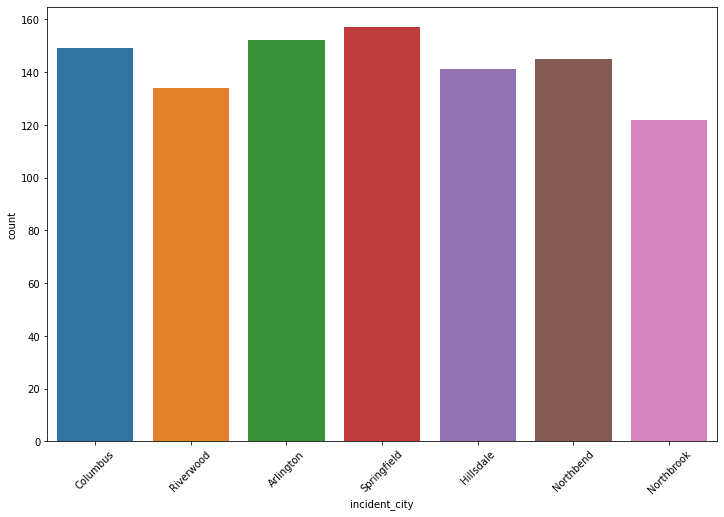

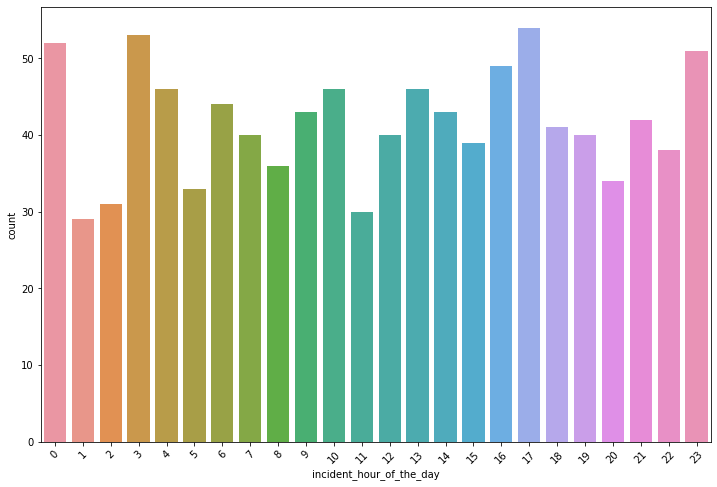

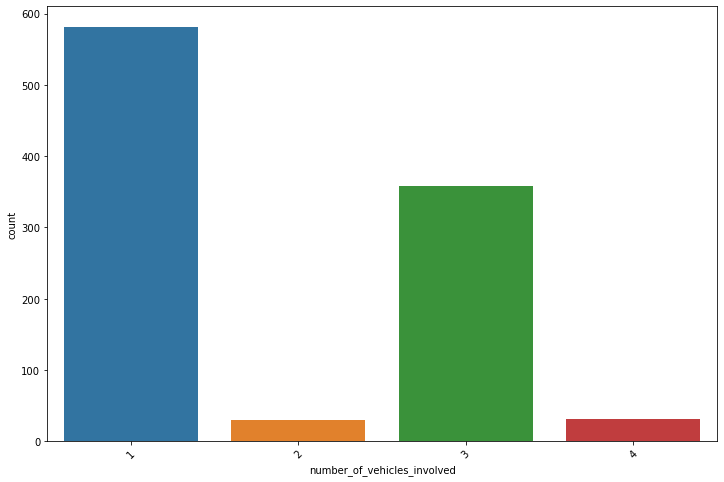

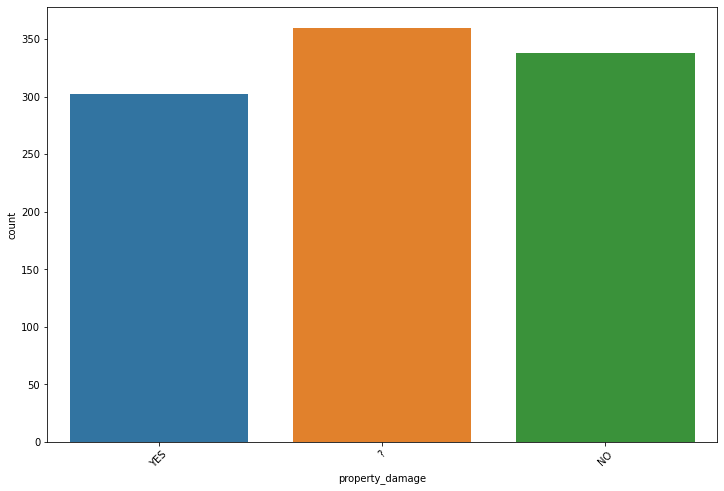

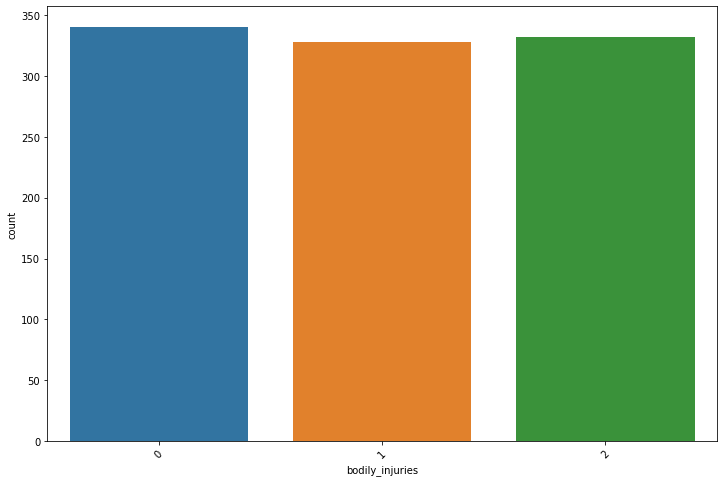

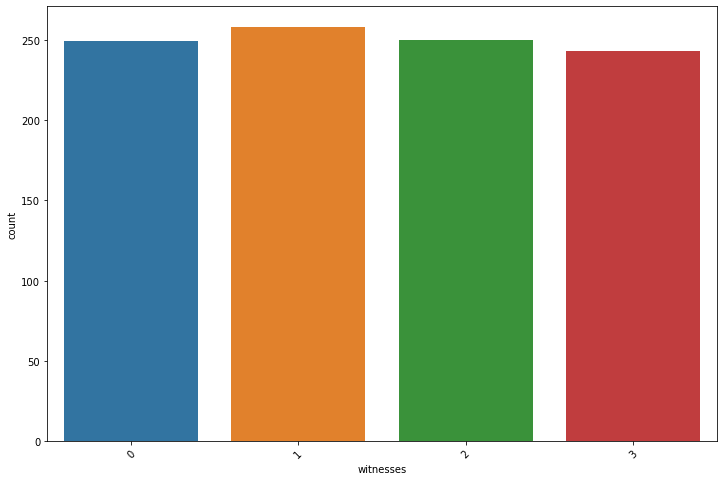

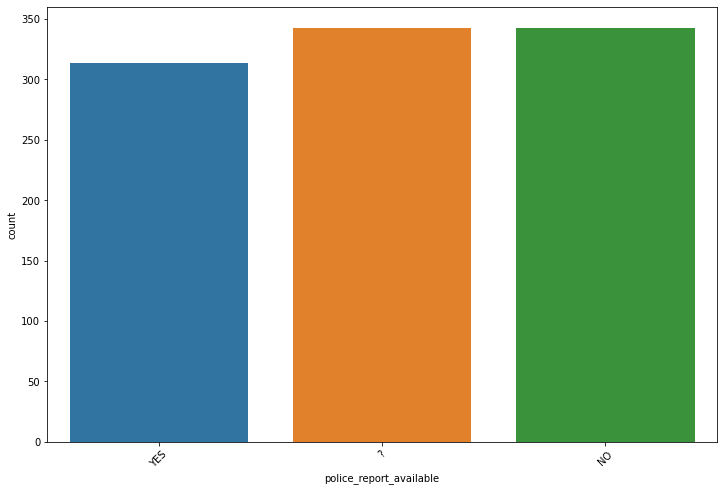

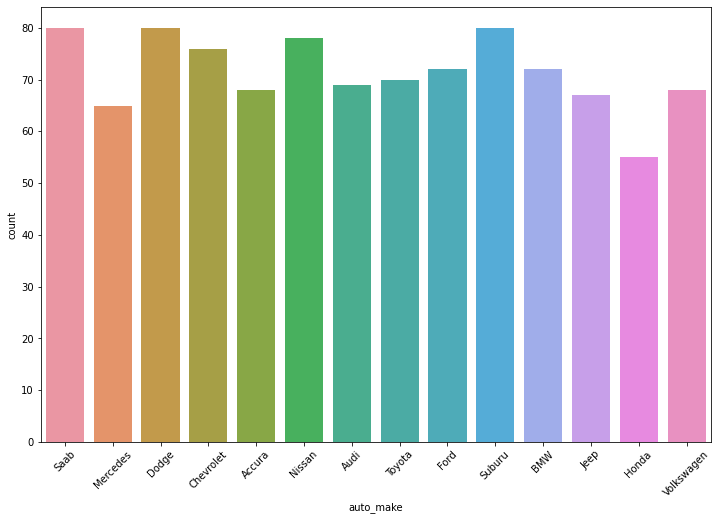

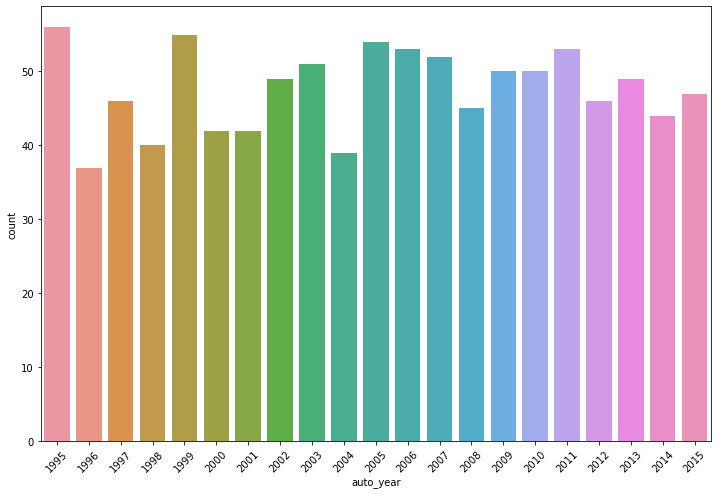

In [21]:
col=[ 'age','policy_state', 'policy_csl', 'policy_deductable','umbrella_limit', 'insured_sex','insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship','incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city','incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available','auto_make','auto_year']

for i in col:
    plt.figure(figsize=(12,8))
    sns.countplot(df[i])
    plt.xticks(rotation=45)
    plt.show()


from the observations we can see that-

Most numberof  customers are 43 years old.

Maximum policies are from OH state.

Policy csl for most of the claims is either 250/500 or 100/300.

Policy deductable for most of the policies is 1000.

Umbrella limit is maximum at 0.

Majority of policies are taken by females.

Most of the customers have education level of either high school or JD.

Most of the customers have occupation of machine-op-inspct.

Reading and exercise are the most common hobbies amongst the customers.

Most of the customers have own child.

Incident type of most of the claims is multi vehicle collision.

Majority of collision happend from the rear side.

Most of the incidents have minor damage.

Police was the most contacted authorities during incidents.

Most of the incidents happend in NY(New York) state.

Springfield is the city with most of the incidents.

Most of the incidents happend during mid-night or in the evening at 1700Hrs.

In most of the cases number of vehicles involved is 1.

Property damage in unknown is most of the cases.

Bodily injuries in most of the cases is 0 follwed by 2.

There is at leas 1 witness in most of the incidents.

Police report was not available or the status is unknown in most of the cases.

Most of the automobiles were manufactured by Saab, Dodge and suburu auto maker.

Most of the vehicles were manufactured in the year 1995 and 1999.

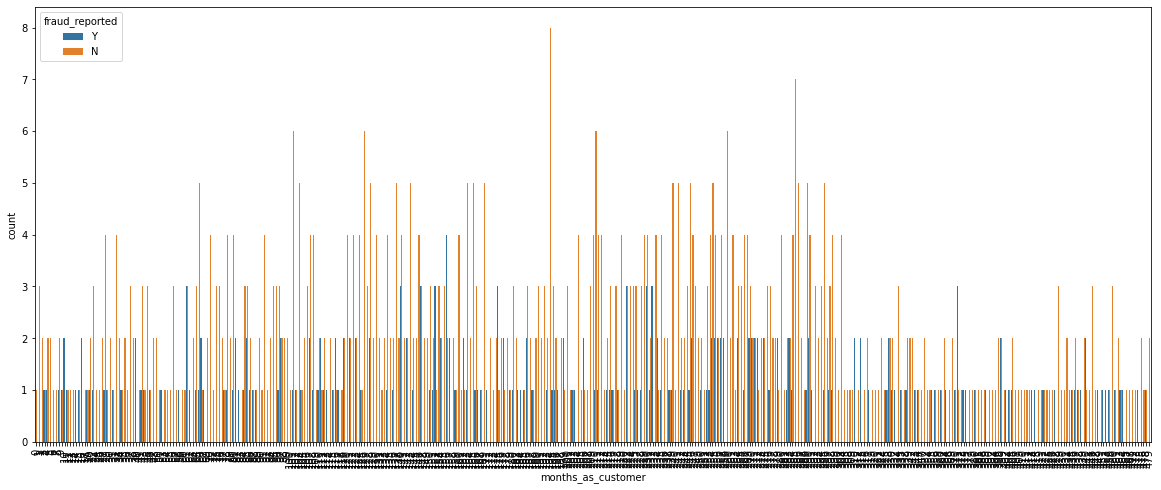

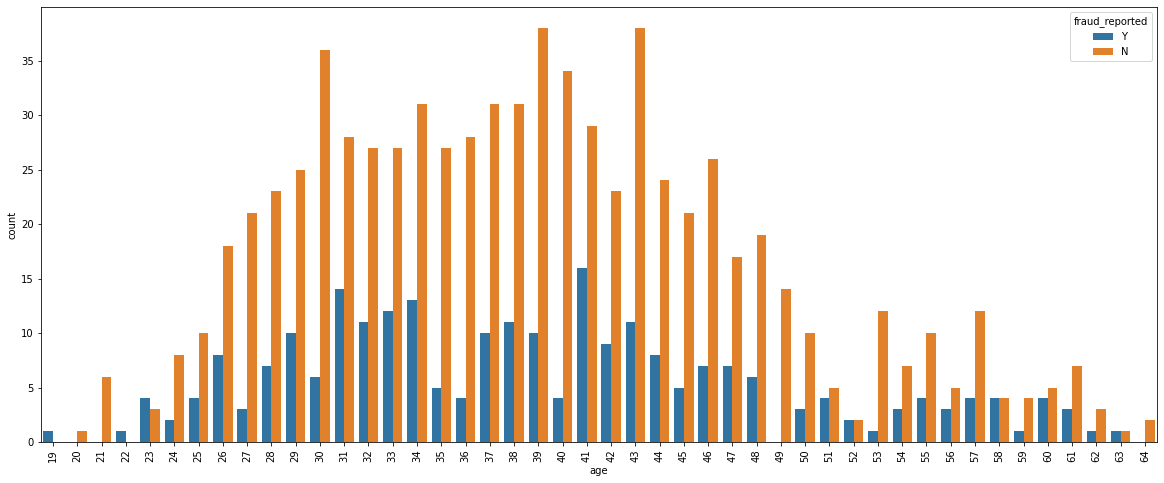

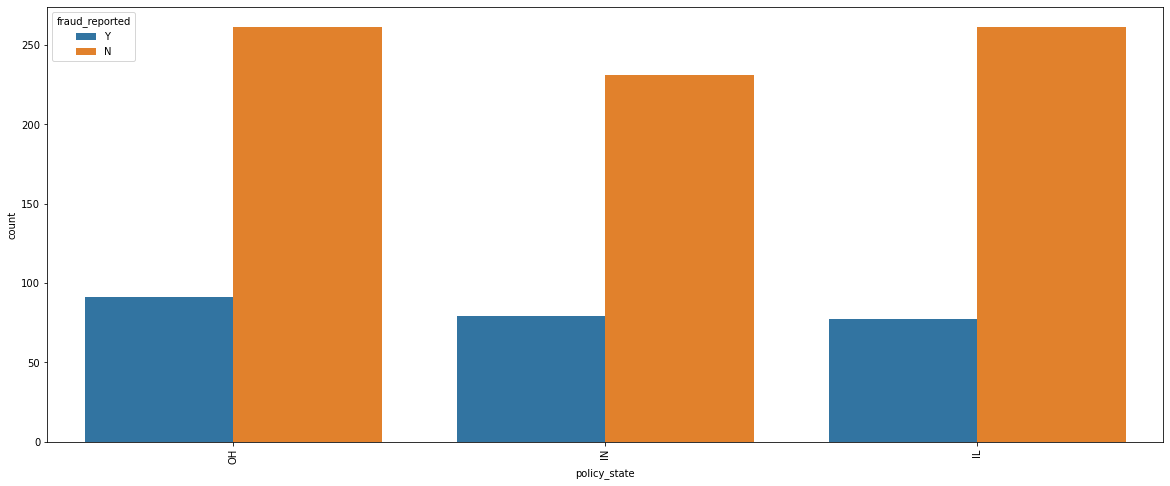

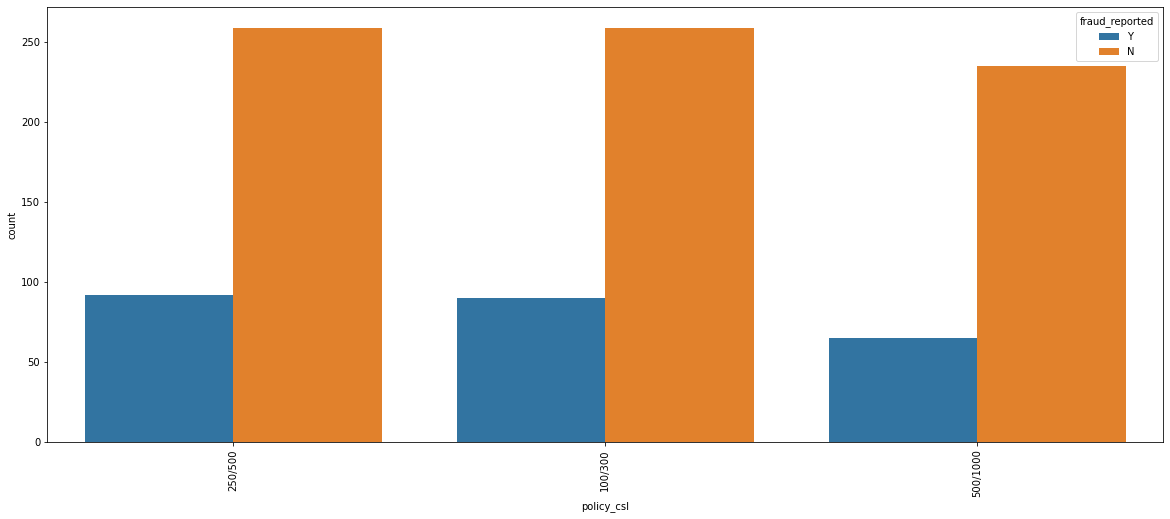

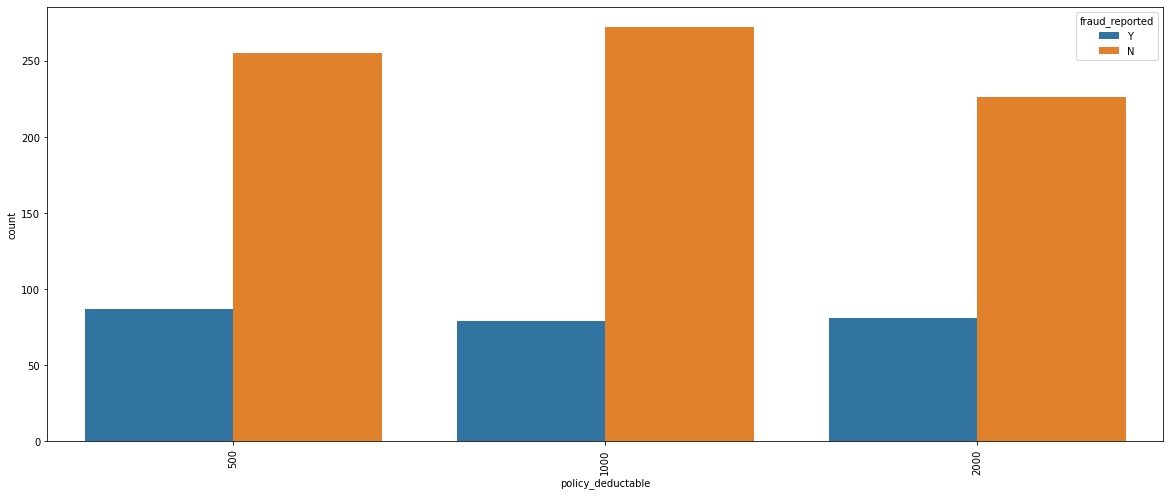

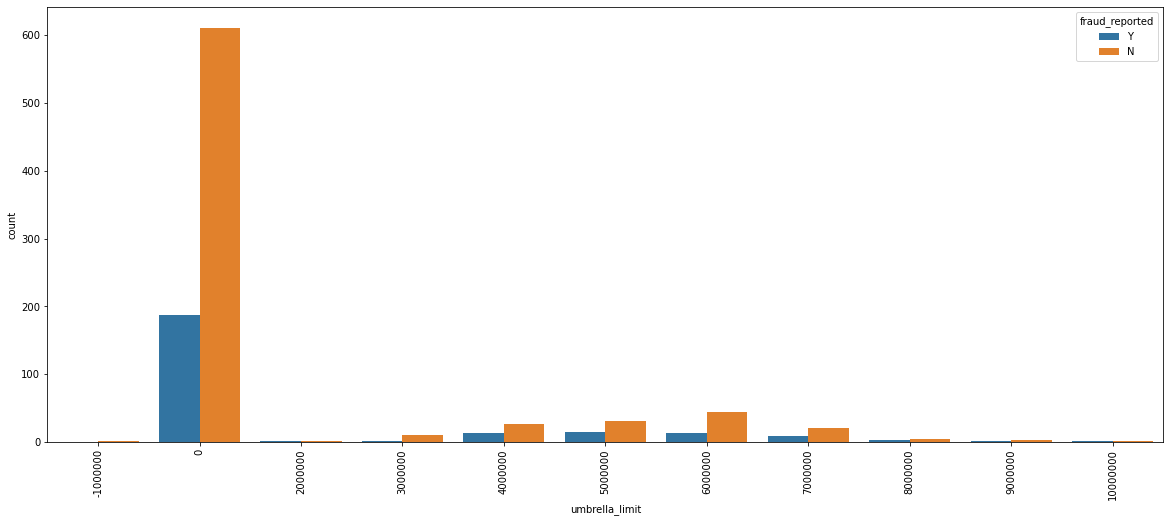

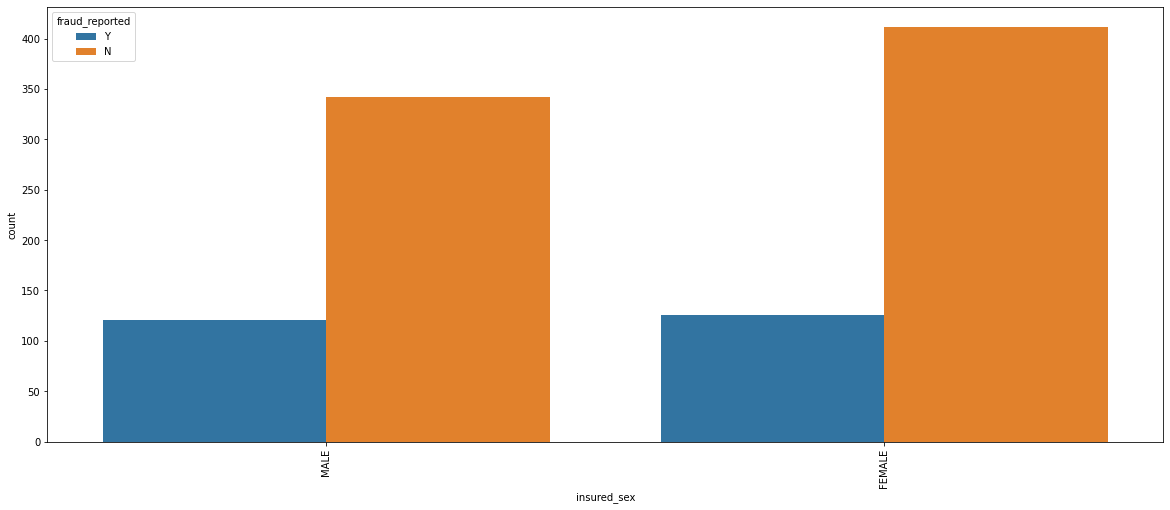

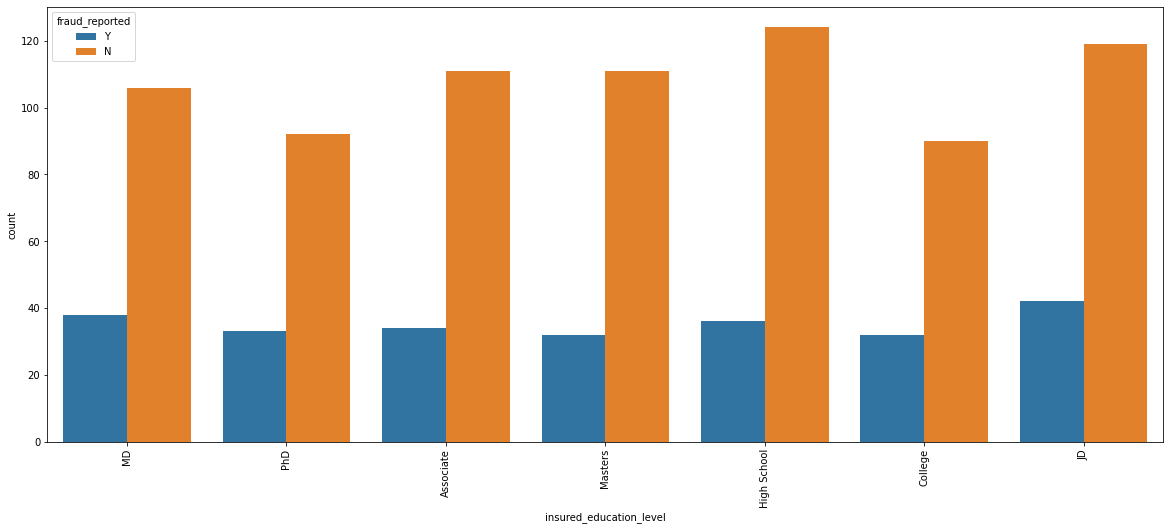

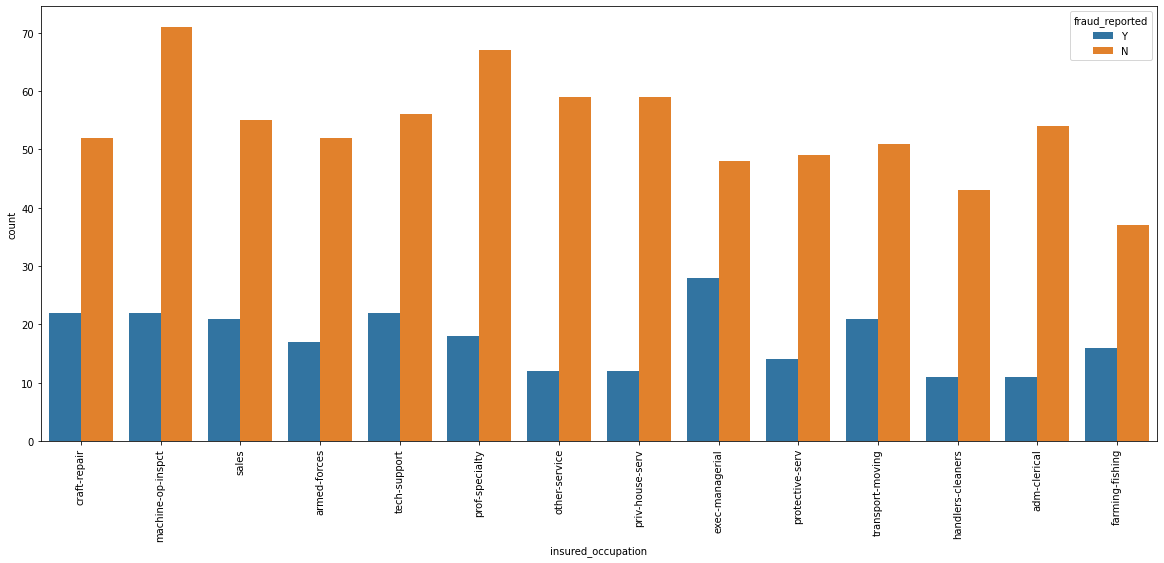

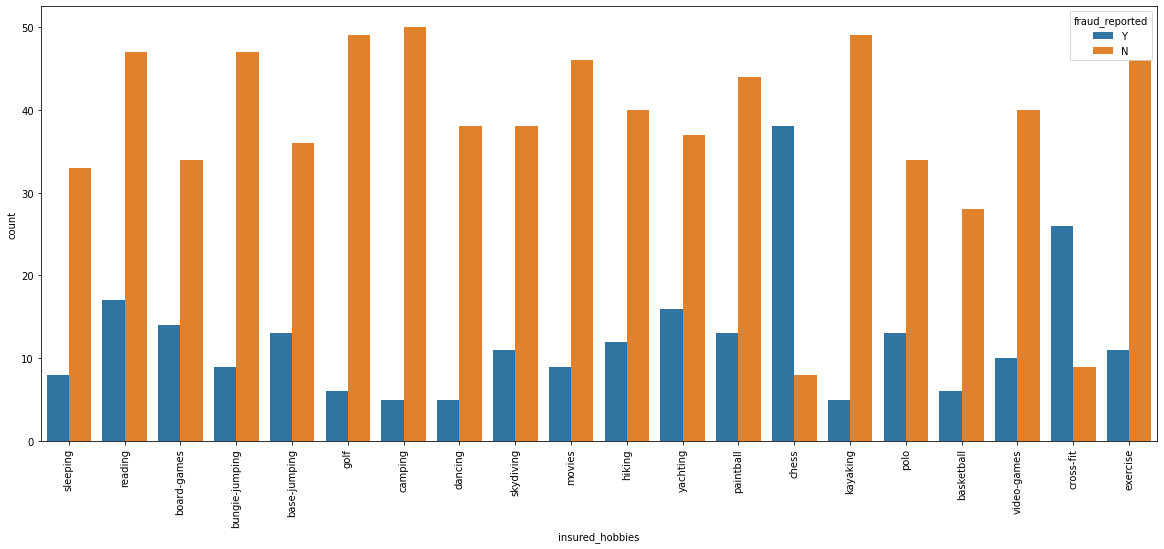

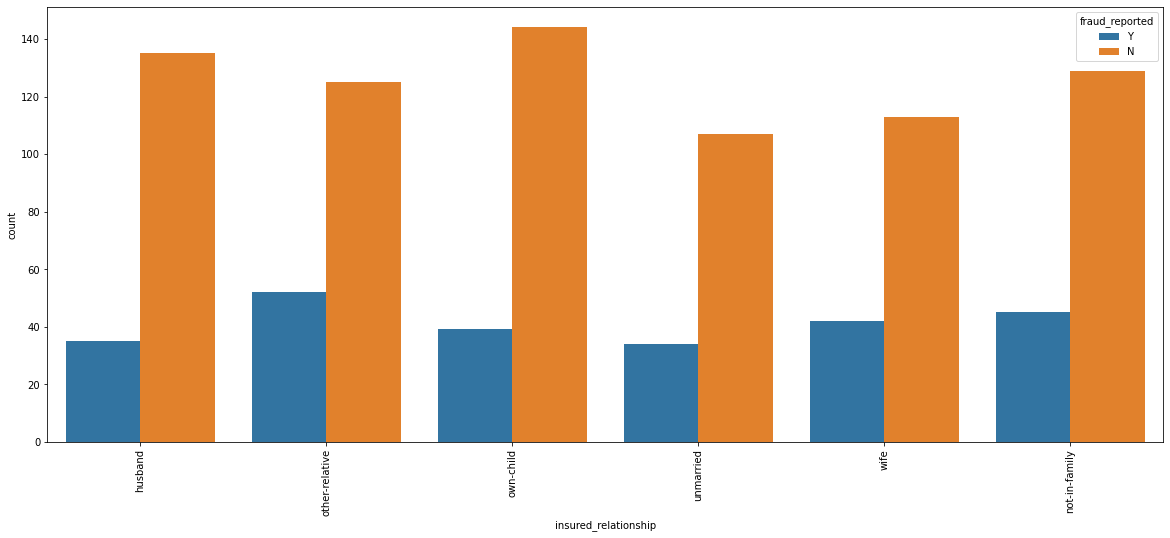

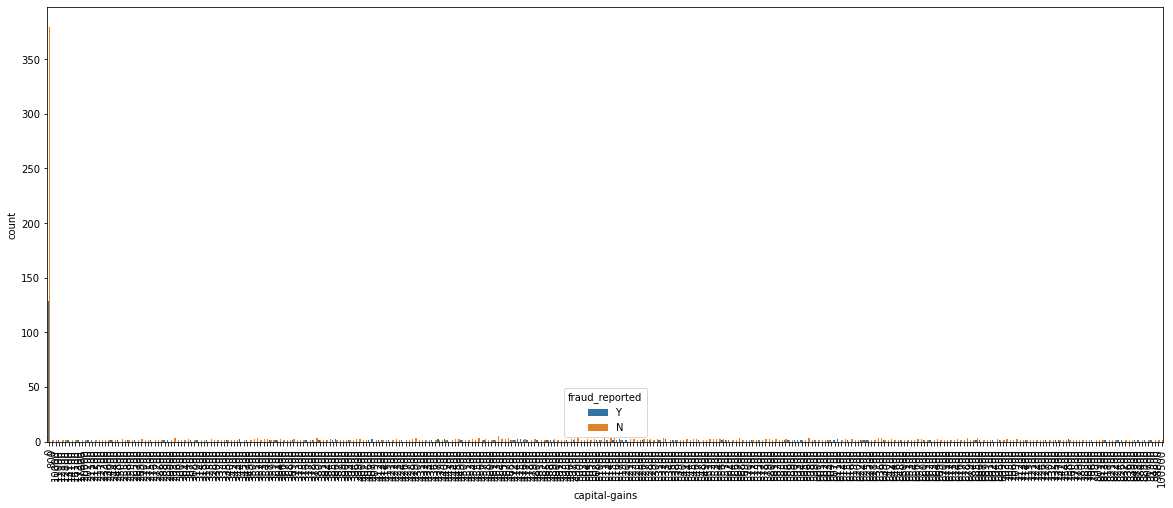

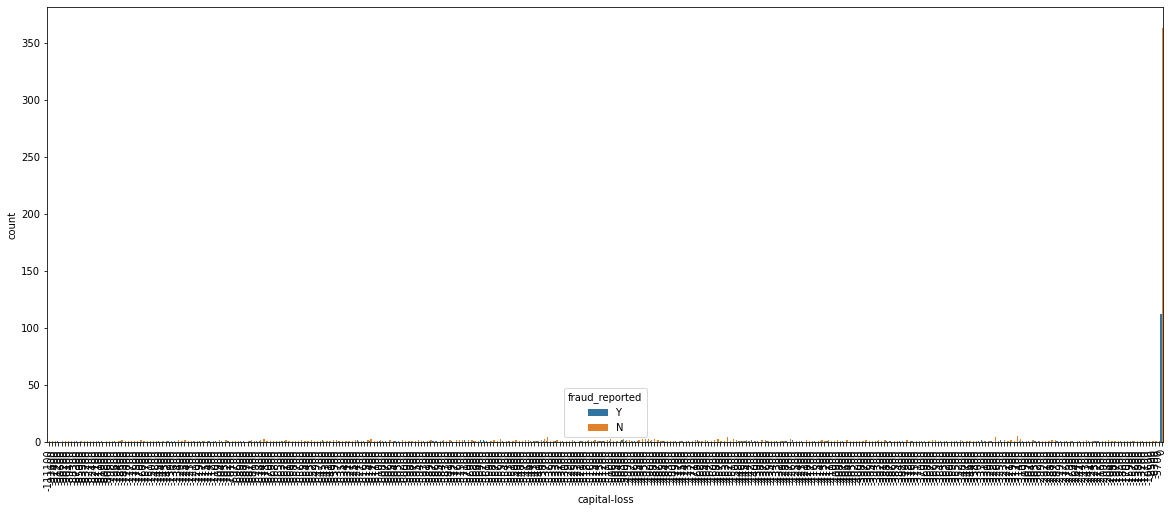

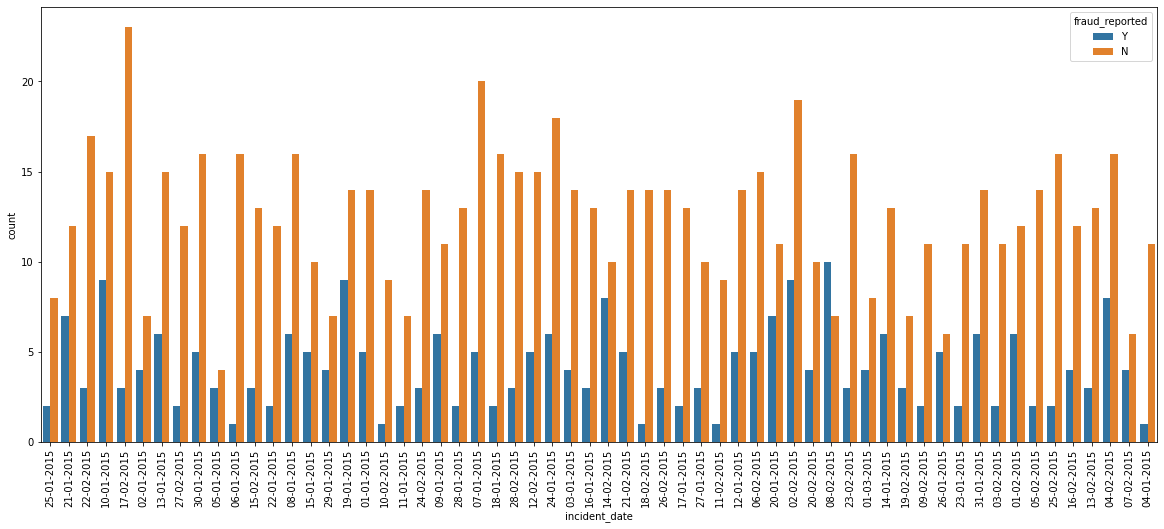

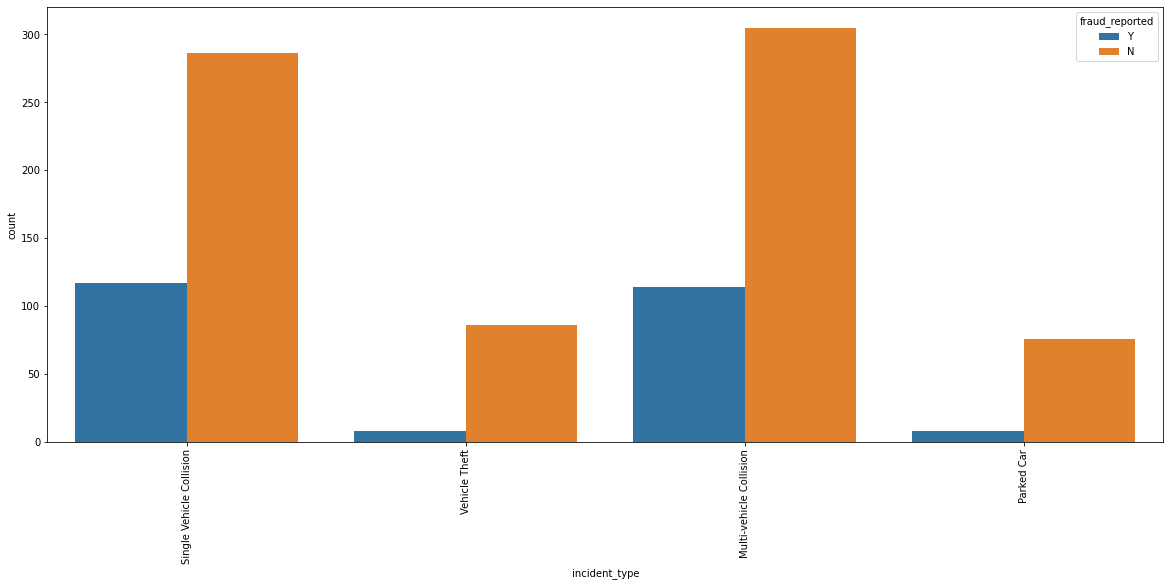

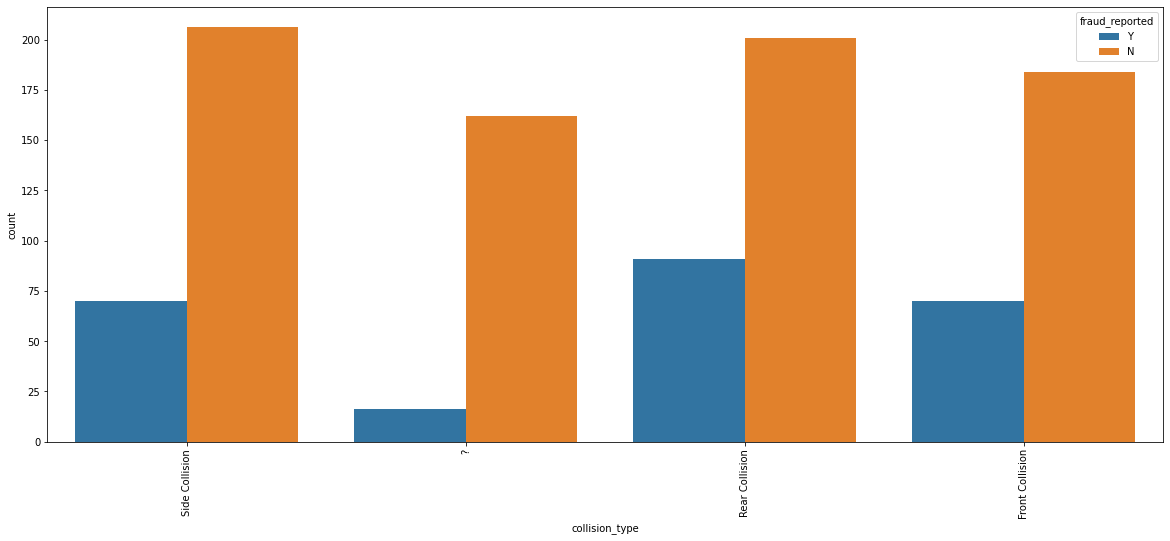

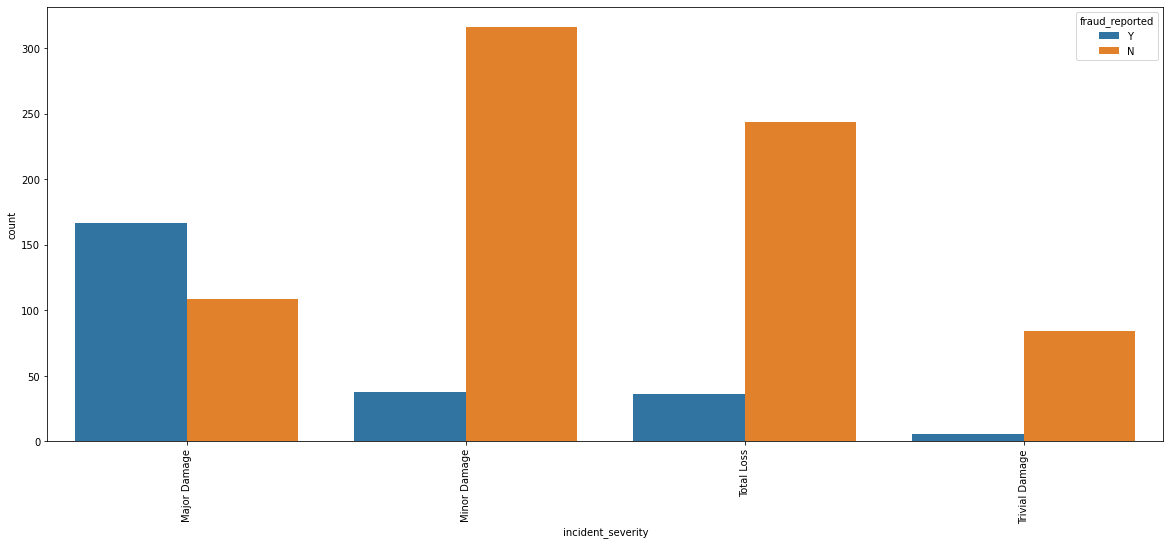

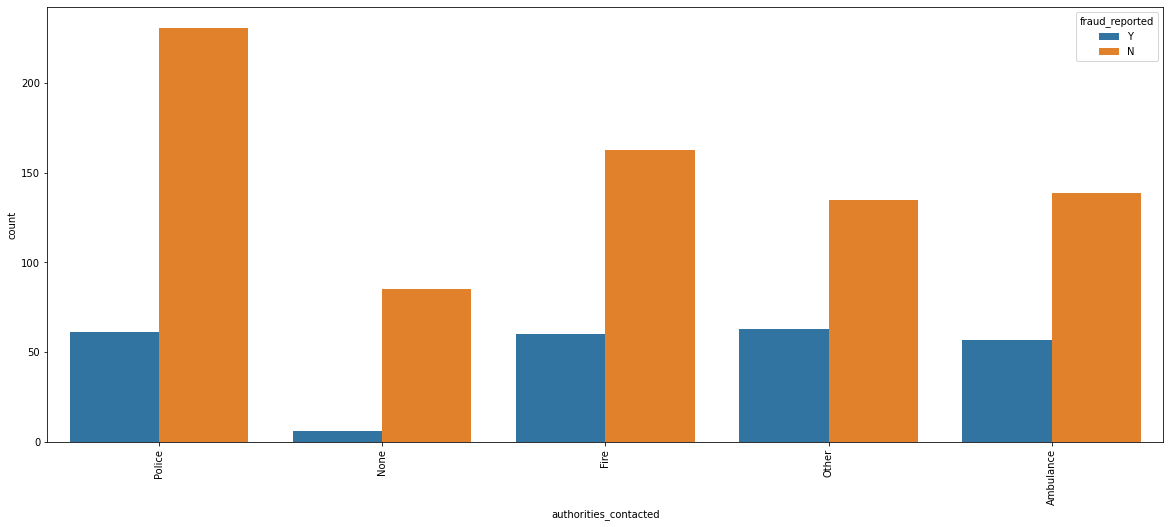

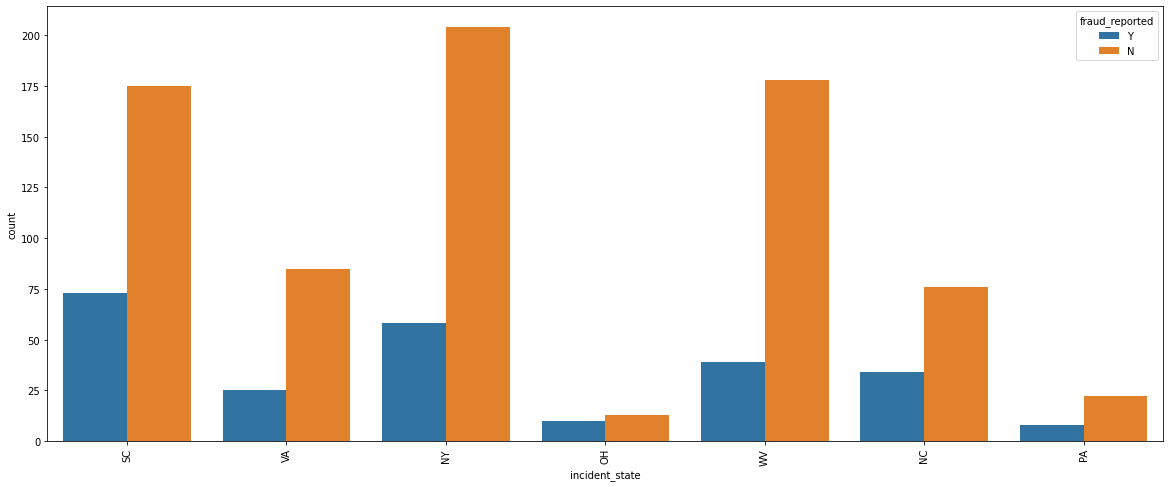

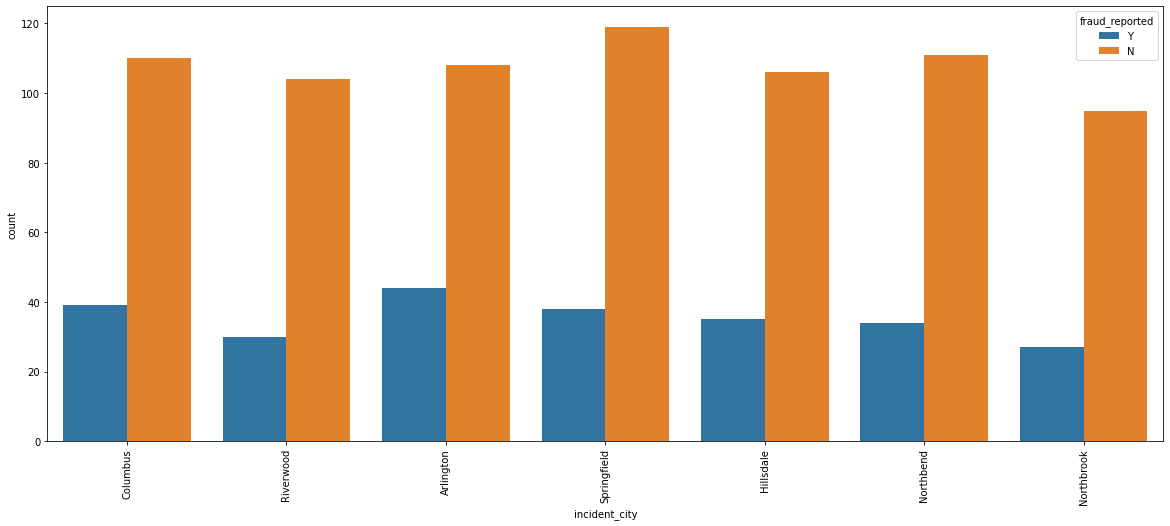

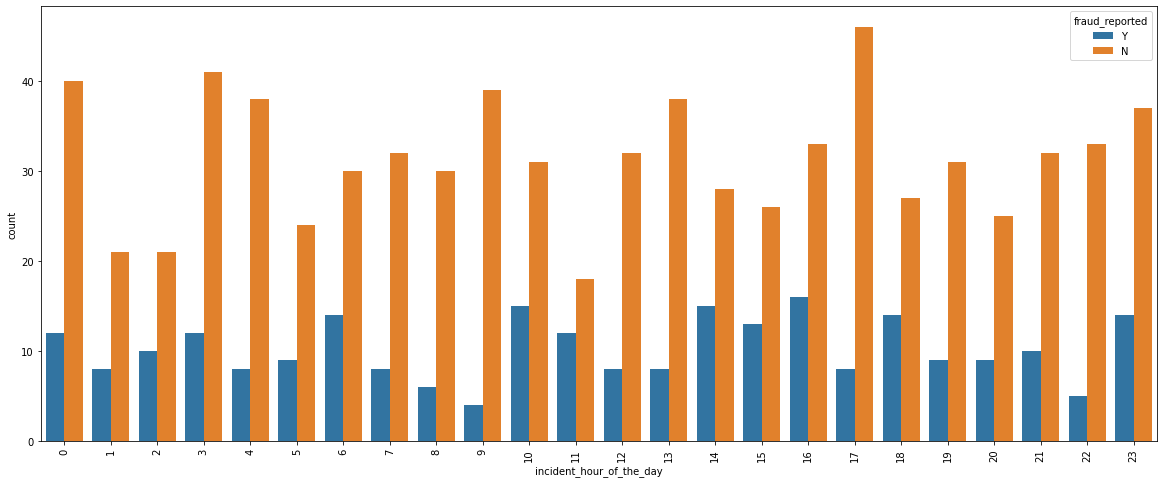

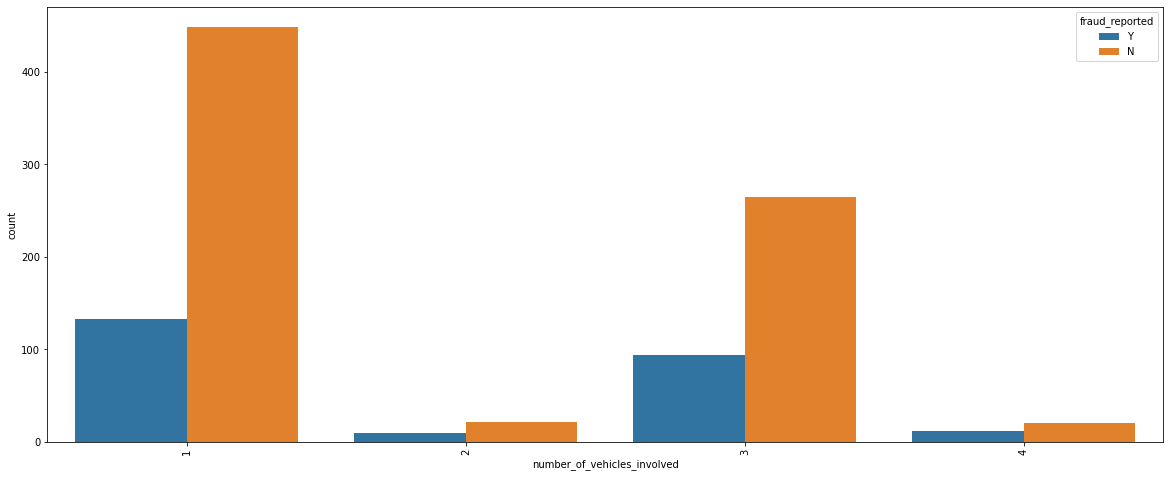

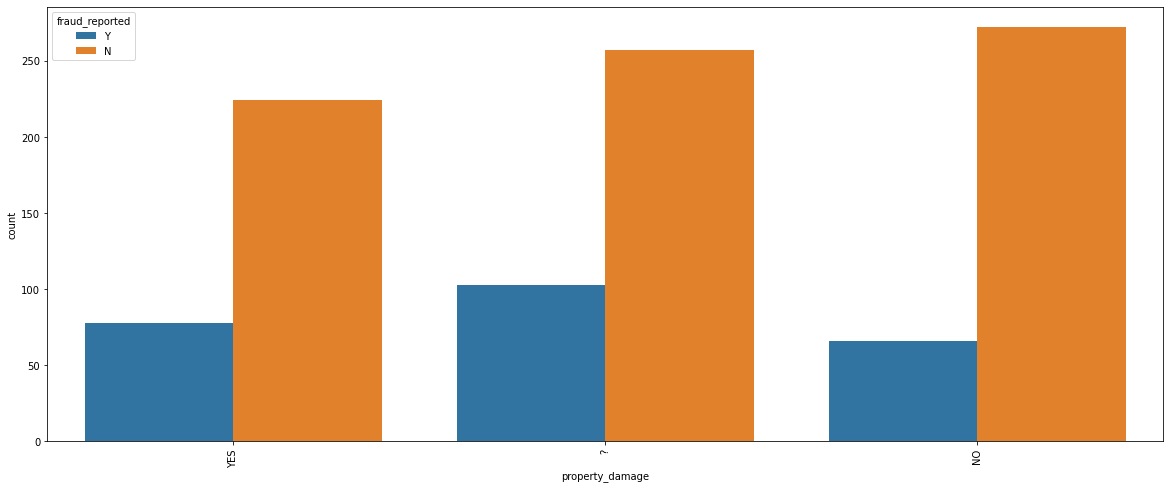

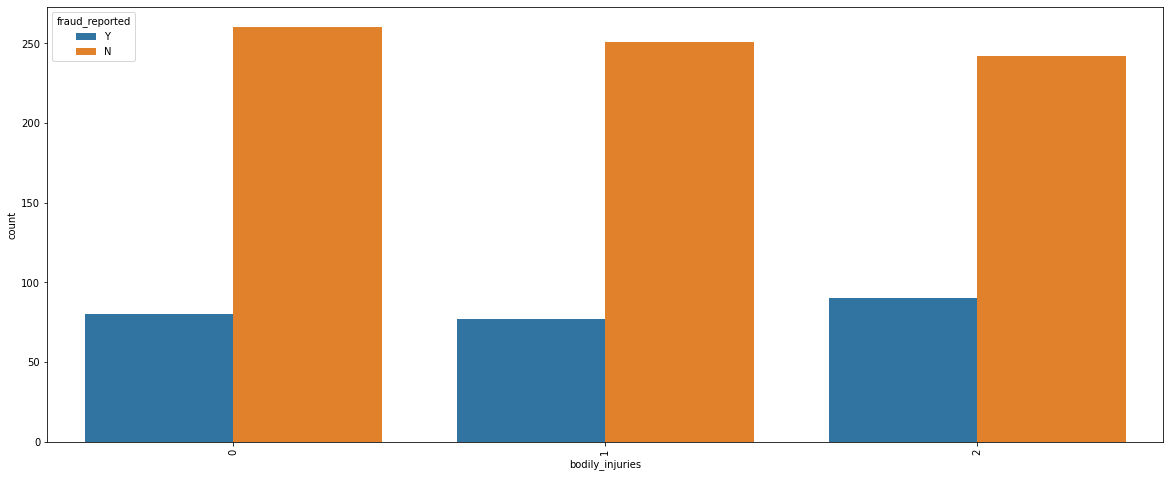

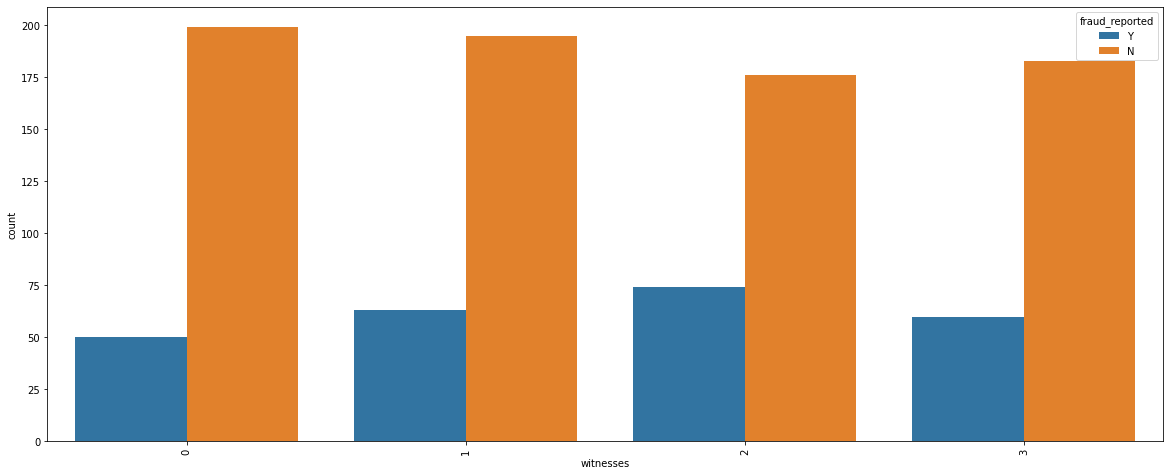

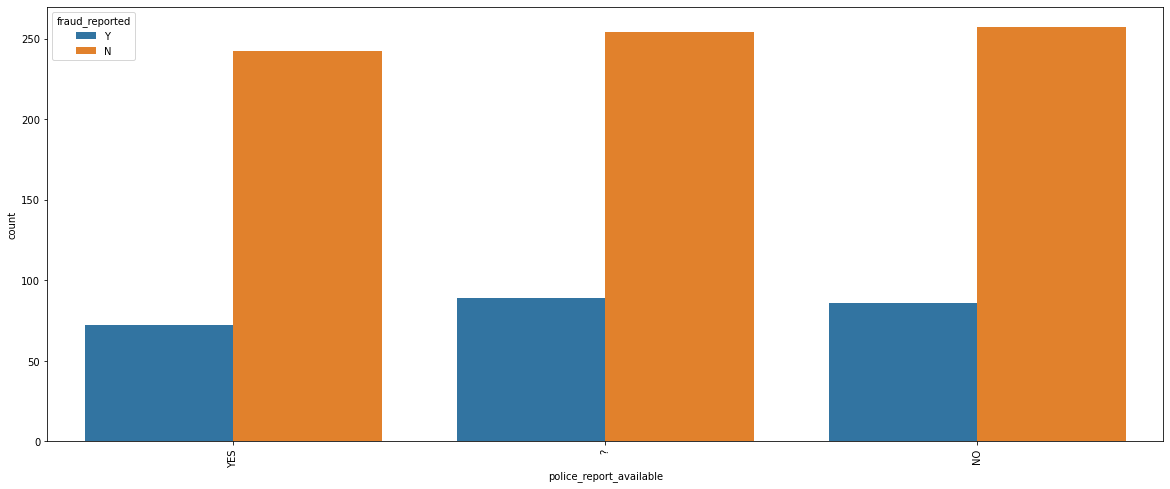

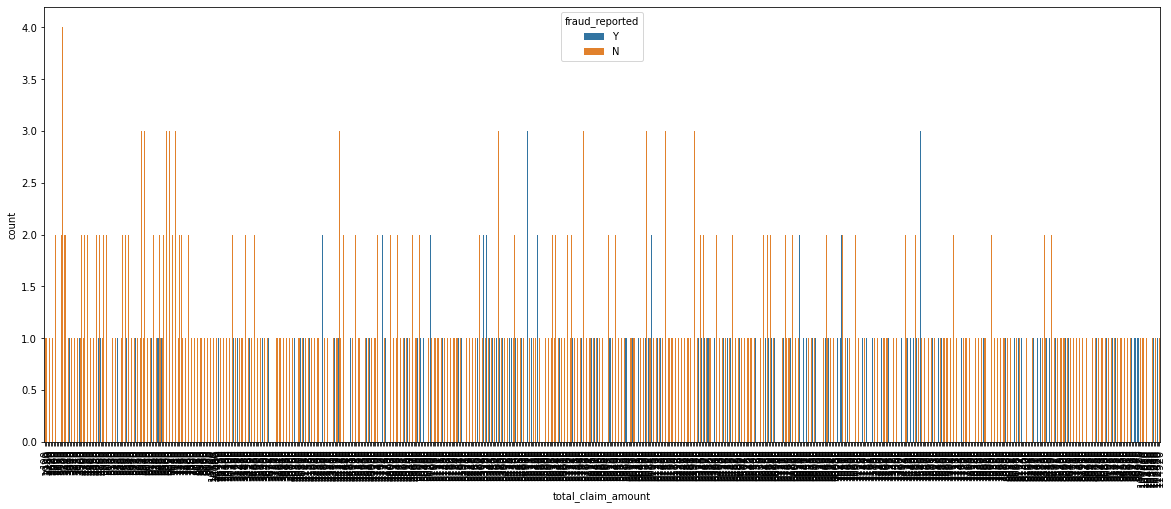

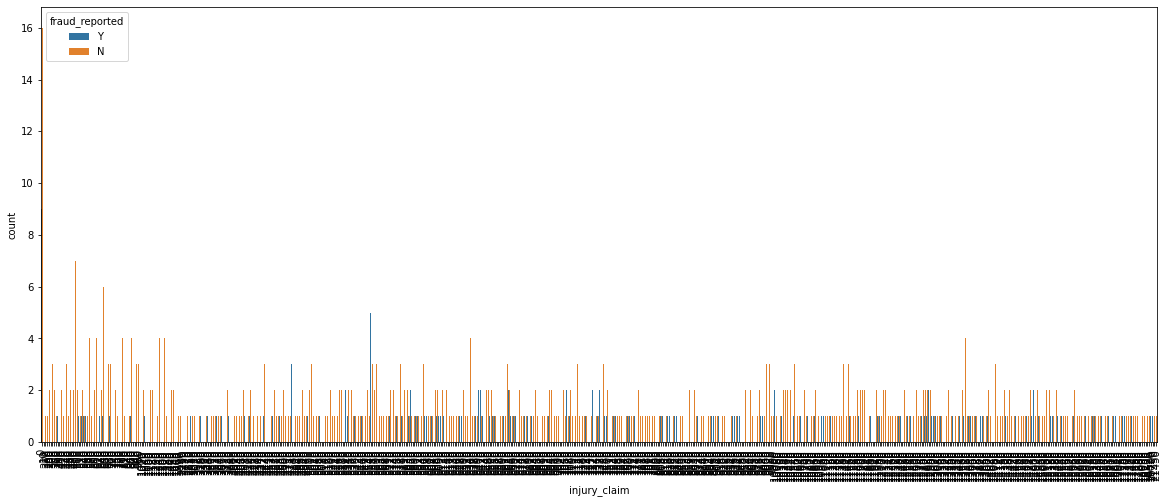

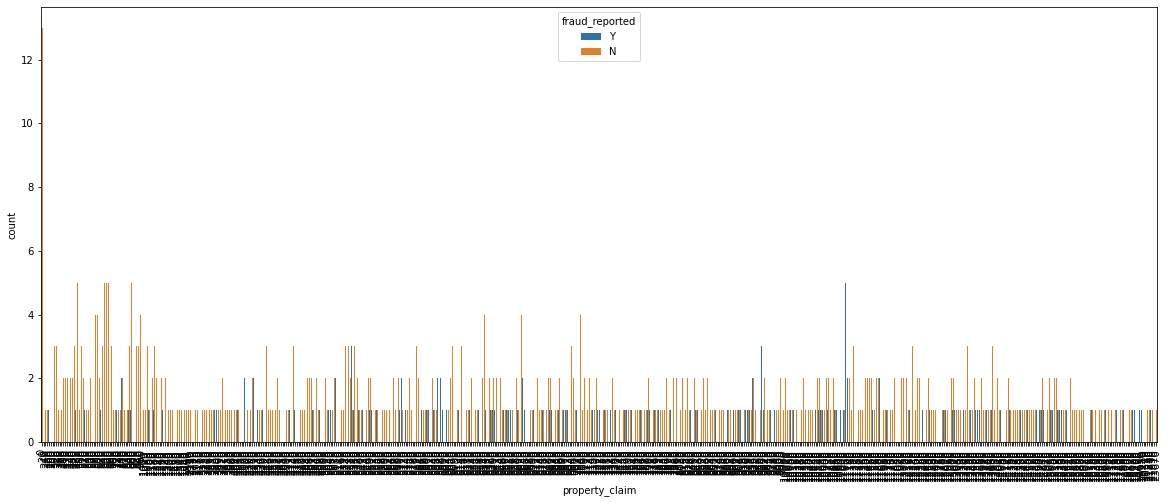

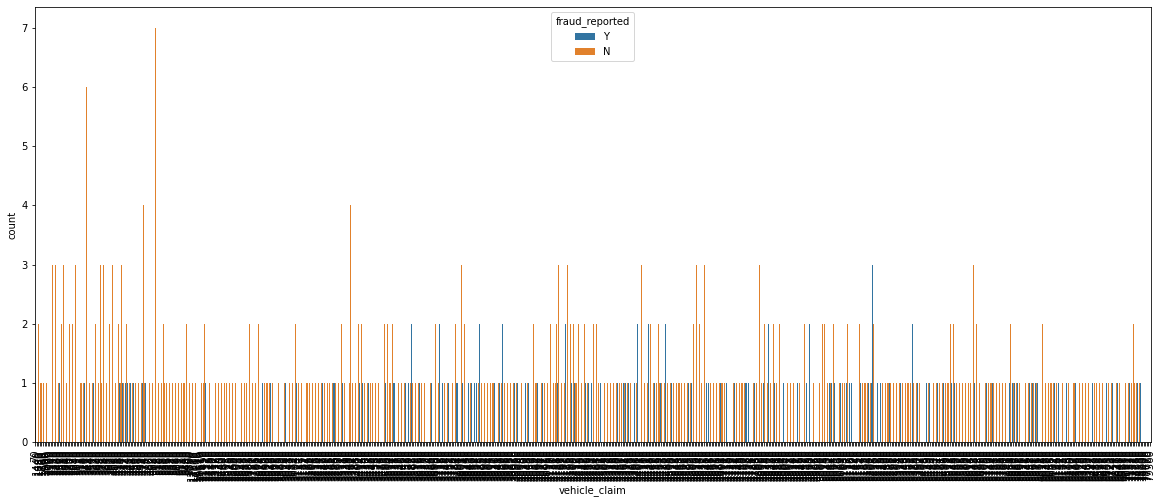

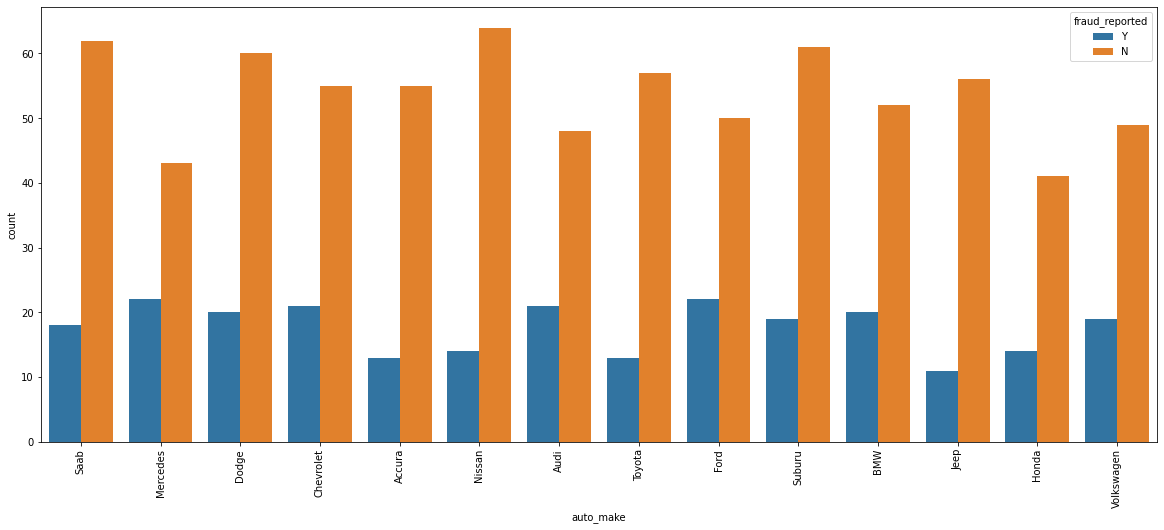

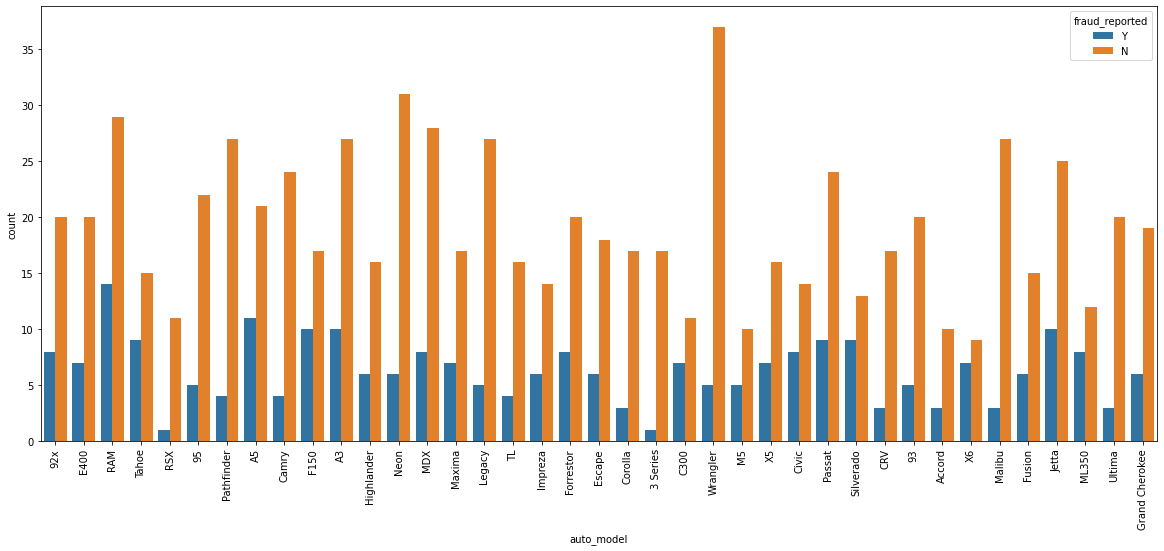

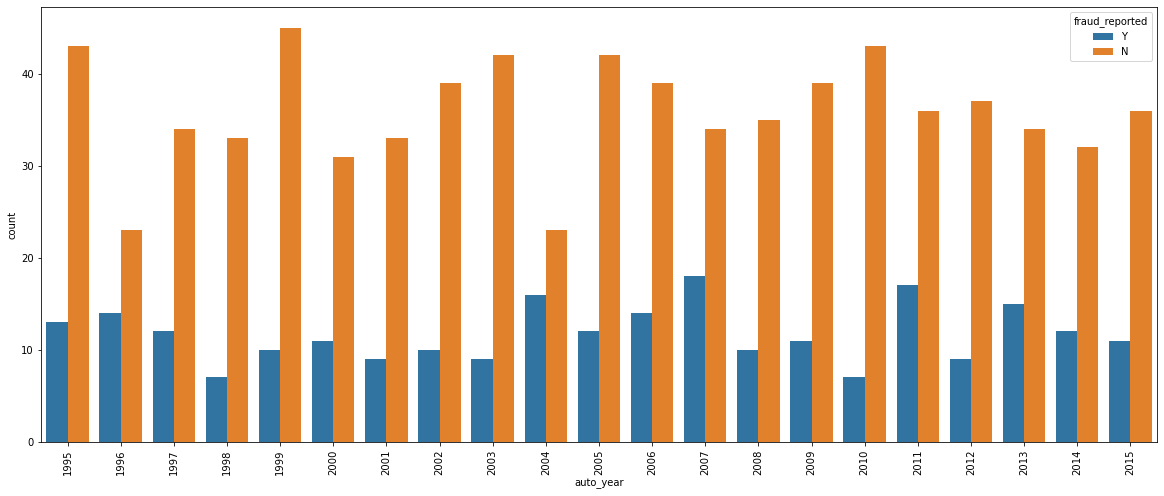

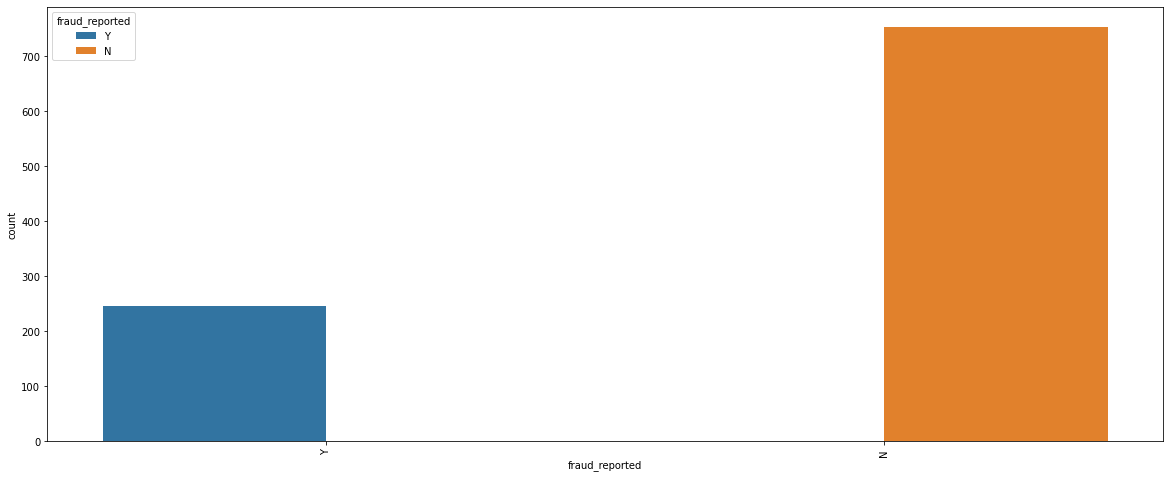

In [22]:
for i in df.columns:
    plt.figure(figsize=(20,8))
    sns.countplot(x=df[i],hue='fraud_reported',data=df)
    plt.xticks(rotation=90)
    plt.show()

from the observations we cn see that-

Most of the customers are of 31 & 41 years old who have reported fraud claims.

Majority of policies are from OH state which were detected as fraud & IN and IL are almost same.

majority of umbrella limit with 0 detected as fraudelent.

Education level of majority of customers who have reported fraud claims is JD.

Most of the customers have exec-managerial occupation who reported fraud claims.

Hobby of most of the fraud customers is chess.

There was rear collision in most of the fraud cases.

Major damage was reported in most of the fraud claims.

Most of the incidents which were fraud are from SC state and least are from PA.

Most of the fraud incidents were happend in Arlington city and least riverwood.

Most of the fraud incidents were reported at around 1600Hrs.

Number of vehicles involved in most of the fraud cases is 1.

Property damage was unkonwn in most of the fraud claims.

There were 2 bodily injuries in most of the fraud cases.

There were 2 witnesses in most of the fraud claims.

Police report is no available or the status is unknown in most of the fraud cases.

Owner of Ford and Mercedes have reported most number of fraud claims and least by jeep.

Most of the vehicles were manufactured in the year 2007 in fraud cases.

In [23]:
#extracting date month and year from date column.

df['date']=pd.to_datetime(df.incident_date, format='%d-%m-%Y').dt.day
df['month']=pd.to_datetime(df.incident_date, format='%d-%m-%Y').dt.month
df['year']=pd.to_datetime(df.incident_date, format='%d-%m-%Y').dt.year

In [24]:
df['date'].unique()

array([25, 21, 22, 10, 17,  2, 13, 27, 30,  5,  6, 15,  8, 29, 19,  1, 11,
       24,  9, 28,  7, 18, 12,  3, 16, 14, 26, 20, 23, 31,  4],
      dtype=int64)

In [25]:
df['month'].unique()

array([1, 2, 3], dtype=int64)

In [26]:
df['year'].unique()

array([2015], dtype=int64)

In [27]:
#as year is only 2015 so we r dropping that and also now we can dorp incident date too, we have already extracted date & month.
df.drop(columns=['incident_date','year'],inplace=True)

In [28]:
df.shape

(1000, 35)

In [29]:
df.sample()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,date,month
15,473,58,IN,100/300,2000,0,FEMALE,MD,transport-moving,movies,other-relative,55700,0,Multi-vehicle Collision,Side Collision,Major Damage,Other,WV,Hillsdale,12,4,YES,0,0,NO,63120,10520,10520,42080,Accura,MDX,1999,Y,29,1


# Correlation

In [30]:
print("data description")
df.describe().T

data description


,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,203.954,1.151132e+02,0.0,115.75,199.5,276.25,479.0
age,1000.0,38.948,9.140287e+00,19.0,32.00,38.0,44.00,64.0
policy_deductable,1000.0,1136.000,6.118647e+02,500.0,500.00,1000.0,2000.00,2000.0
umbrella_limit,1000.0,1101000.000,2.297407e+06,-1000000.0,0.00,0.0,0.00,10000000.0
capital-gains,1000.0,25126.100,2.787219e+04,0.0,0.00,0.0,51025.00,100500.0
capital-loss,1000.0,-26793.700,2.810410e+04,-111100.0,-51500.00,-23250.0,0.00,0.0
incident_hour_of_the_day,1000.0,11.644,6.951373e+00,0.0,6.00,12.0,17.00,23.0
number_of_vehicles_involved,1000.0,1.839,1.018880e+00,1.0,1.00,1.0,3.00,4.0
bodily_injuries,1000.0,0.992,8.201272e-01,0.0,0.00,1.0,2.00,2.0
witnesses,1000.0,1.487,1.111335e+00,0.0,1.00,1.0,2.00,3.0


we can see that-

Maximum number of months as customer is 479 months and mean 204.

Maximum age of customers is 64 years and mean is 39.

Policy deductables are vary from range 500 to 2000.

Total claim amount ranges from 100 to 1,14,920.

Maximum injury claim is 21,450.

Maximum property claim is 23,670.

Maximum vehicle claim is 79,560.

Before checking correlation, convert target variable into label.

In [31]:
df['fraud_reported'].replace(to_replace='Y',value=1,inplace=True)
df['fraud_reported'].replace(to_replace='N',value=0,inplace=True)

<AxesSubplot:>

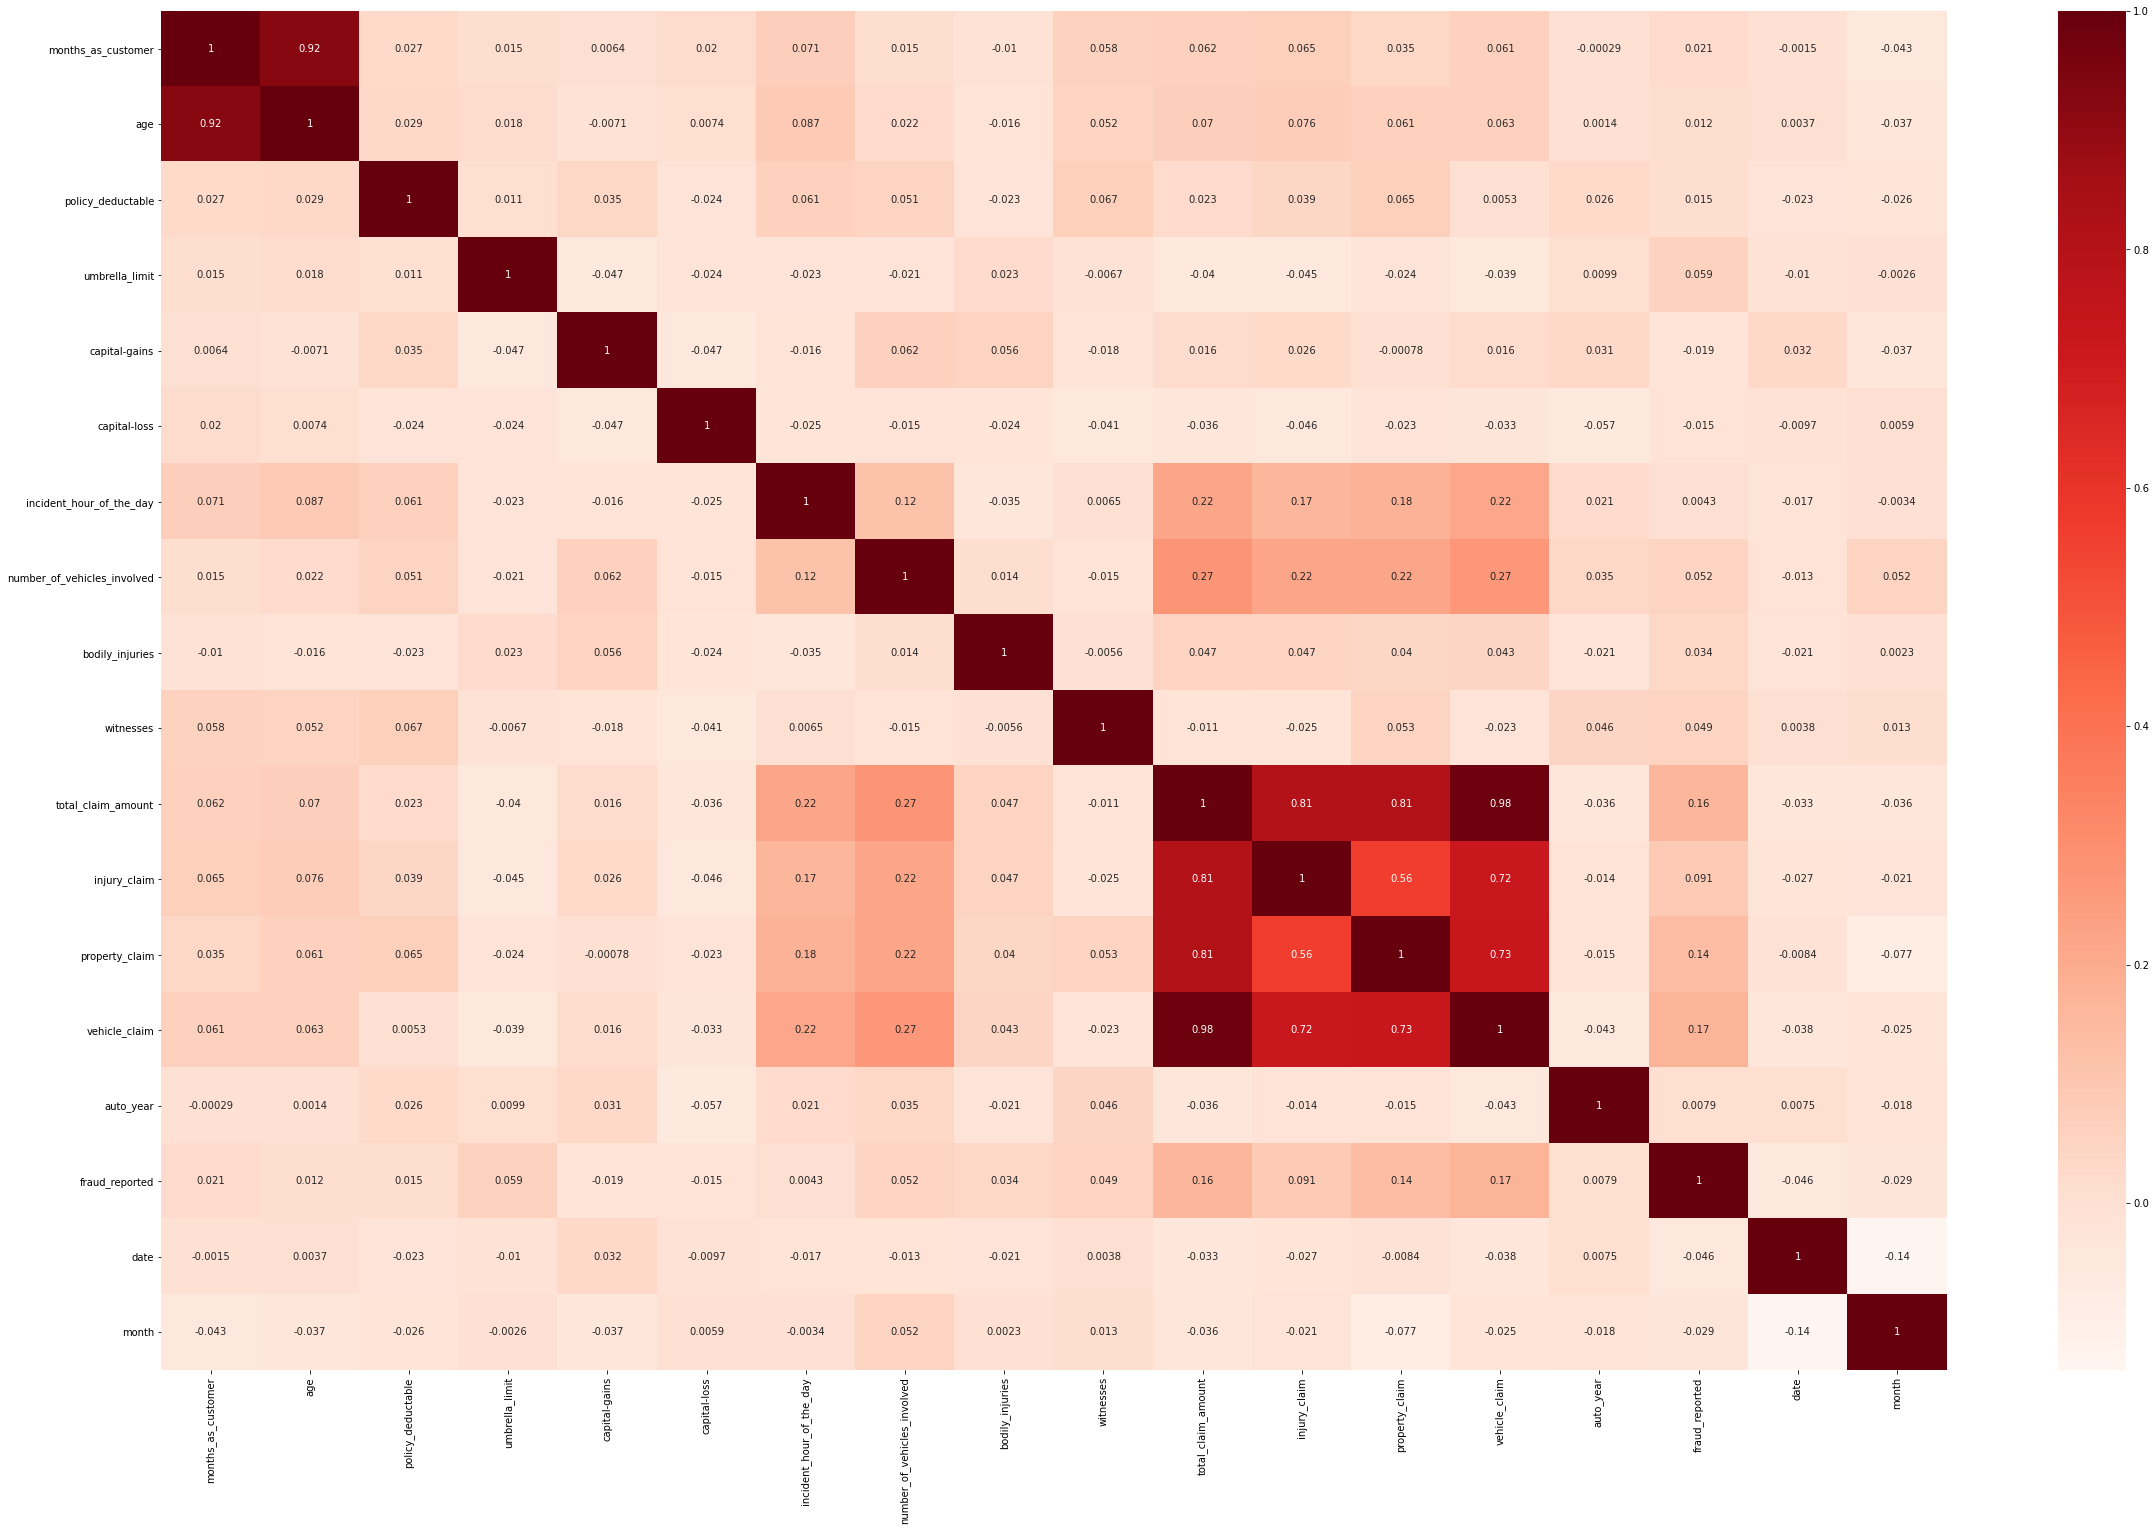

In [32]:
plt.figure(figsize=(40,25))
sns.heatmap(df.corr(),annot=True,cmap='Reds')


date & month are least correlation with atrget fraud detected, so we can drop them too.

Total claim amount is strongly correlated with injury claim, property claim and vehical claim.

Months as customer is strongly correlated with age of the customer.

In [33]:
df.drop(columns=['date','month'],inplace=True)

In [34]:
df.shape

(1000, 33)

In [35]:
df.sample()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
488,294,46,IL,100/300,500,0,MALE,College,prof-specialty,exercise,own-child,0,0,Single Vehicle Collision,Side Collision,Total Loss,Other,SC,Northbend,8,1,NO,0,3,YES,65780,11960,11960,41860,Mercedes,ML350,2013,0


# Label Encoding

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    df[i] = le.fit_transform(df[i])

In [37]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,299,29,2,1,1,1,1,4,2,17,0,187,353,2,3,0,4,4,1,5,0,2,1,2,2,563,258,512,545,10,1,9,1
1,212,23,1,1,2,5,1,4,6,15,2,0,353,3,0,1,4,5,5,8,0,0,0,0,0,44,46,45,38,8,12,12,1
2,123,10,2,0,2,5,0,6,11,2,3,63,353,0,2,1,4,1,1,7,2,1,2,3,1,143,337,104,116,4,30,12,0
3,239,22,0,1,2,6,0,6,1,2,4,153,98,2,1,0,4,2,0,5,0,0,1,2,1,451,245,249,521,3,34,19,1
4,212,25,0,2,1,6,1,0,11,2,4,265,211,3,0,1,2,1,0,20,0,1,0,1,1,81,70,36,66,0,31,14,0


# Data Cleaning

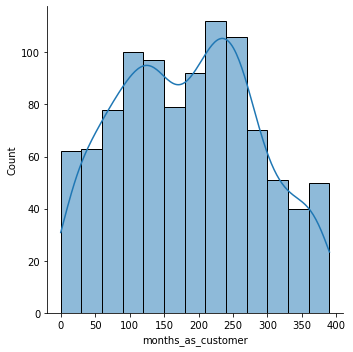

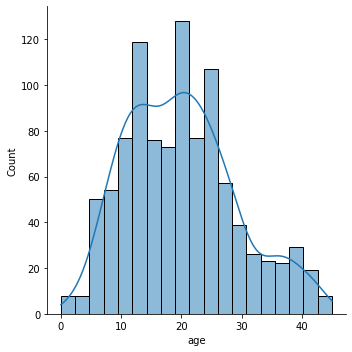

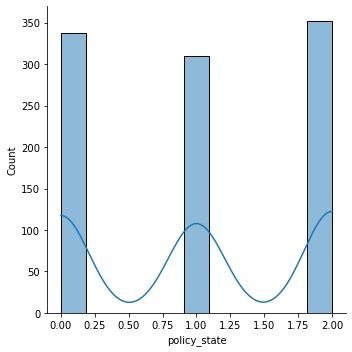

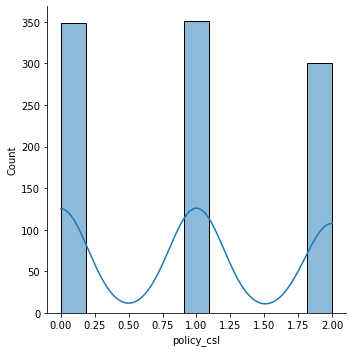

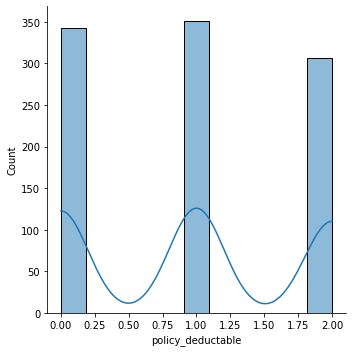

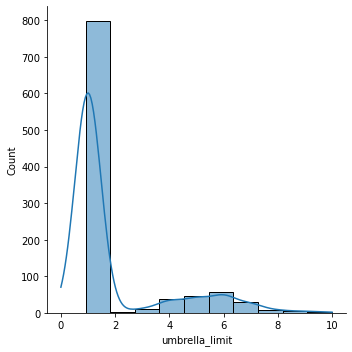

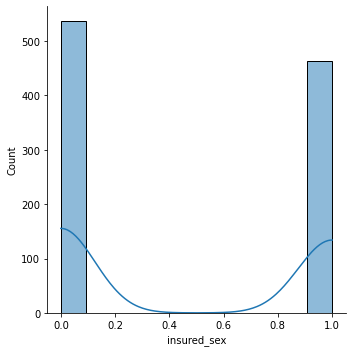

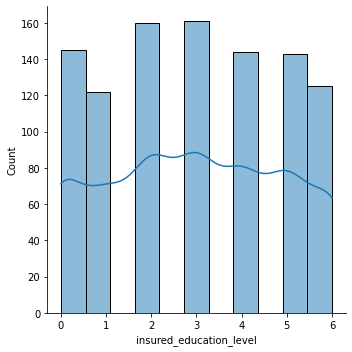

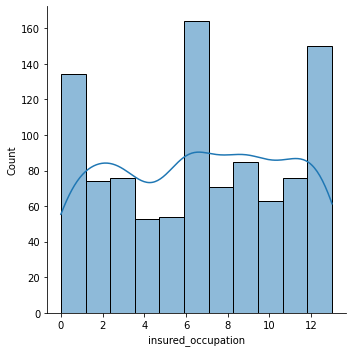

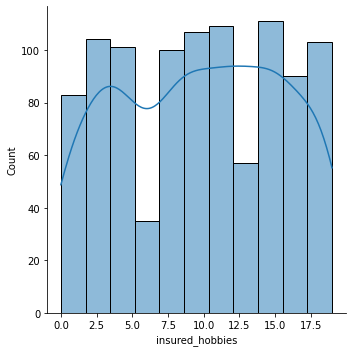

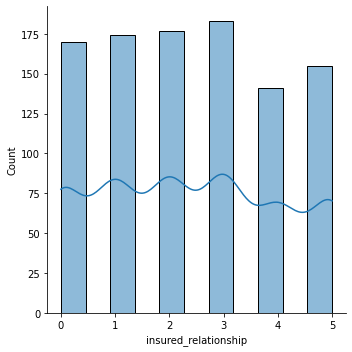

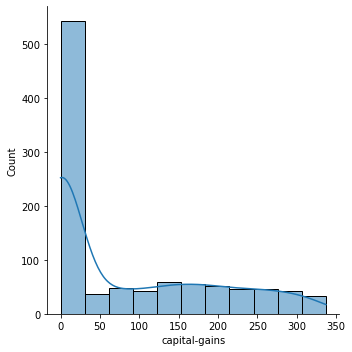

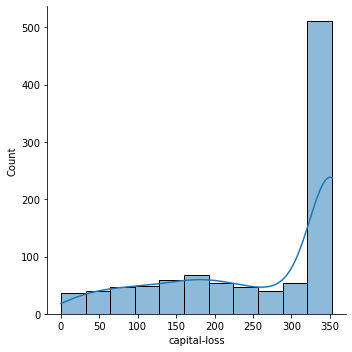

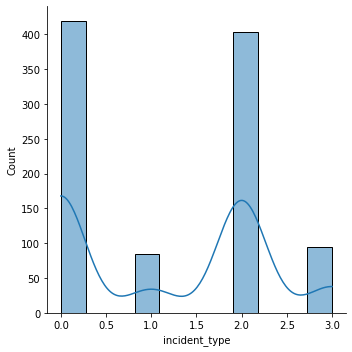

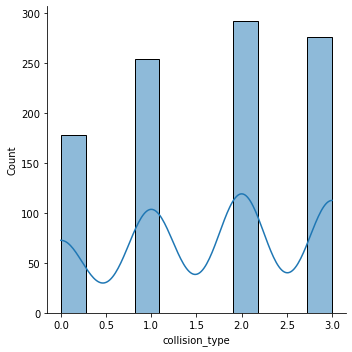

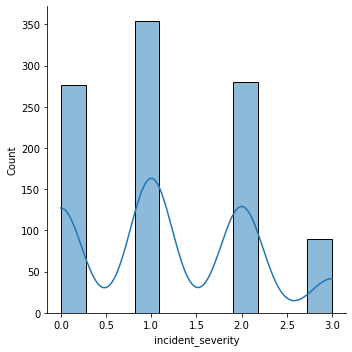

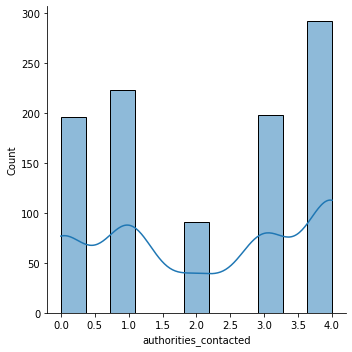

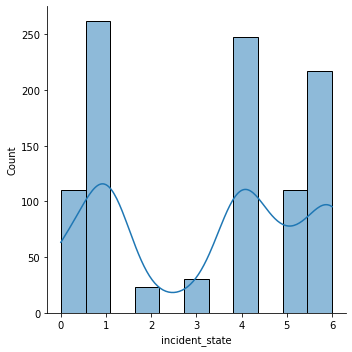

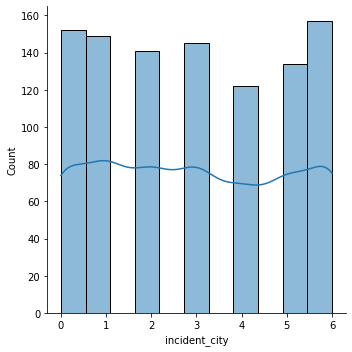

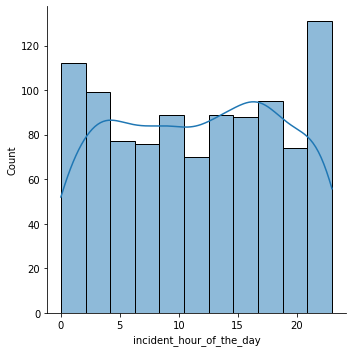

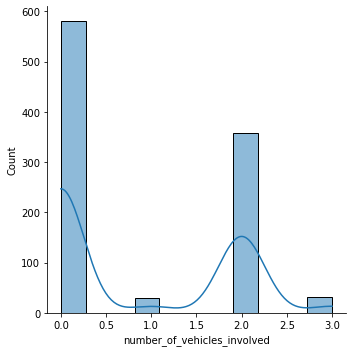

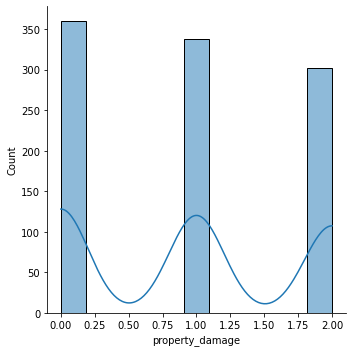

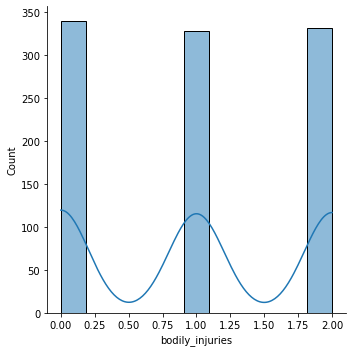

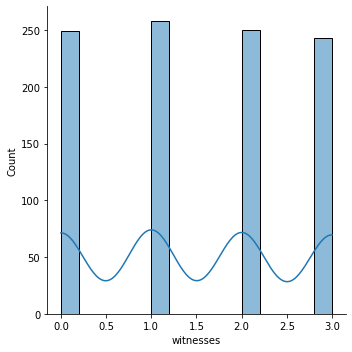

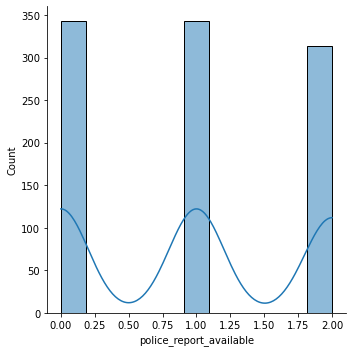

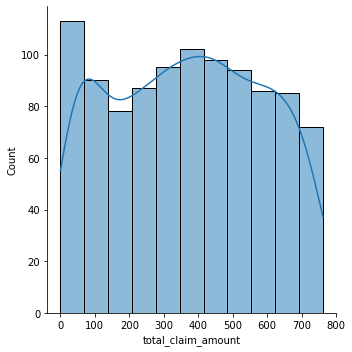

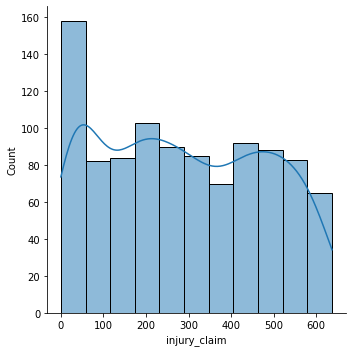

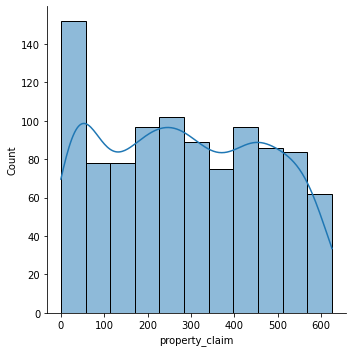

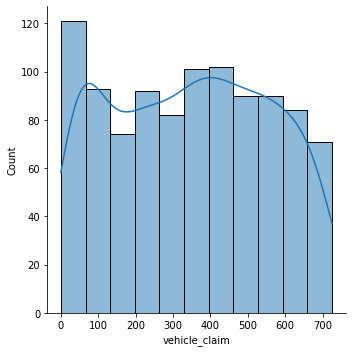

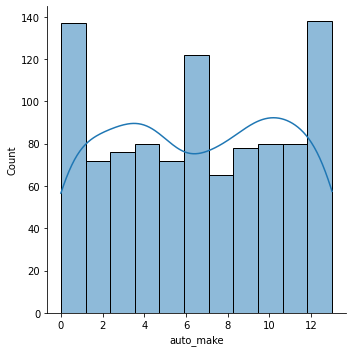

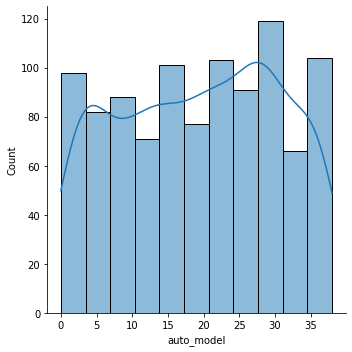

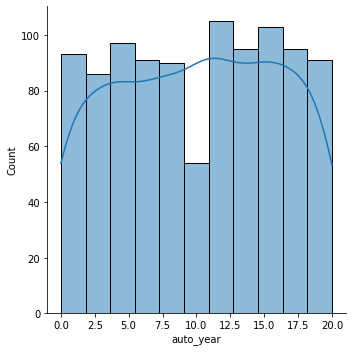

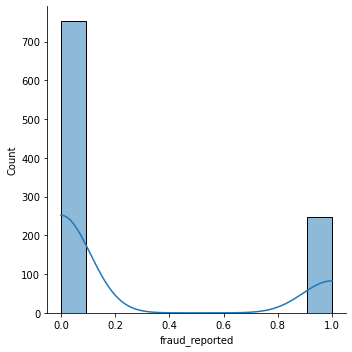

In [38]:
for i in df.columns:
    sns.displot(df[i],kde=True)
    plt.show()

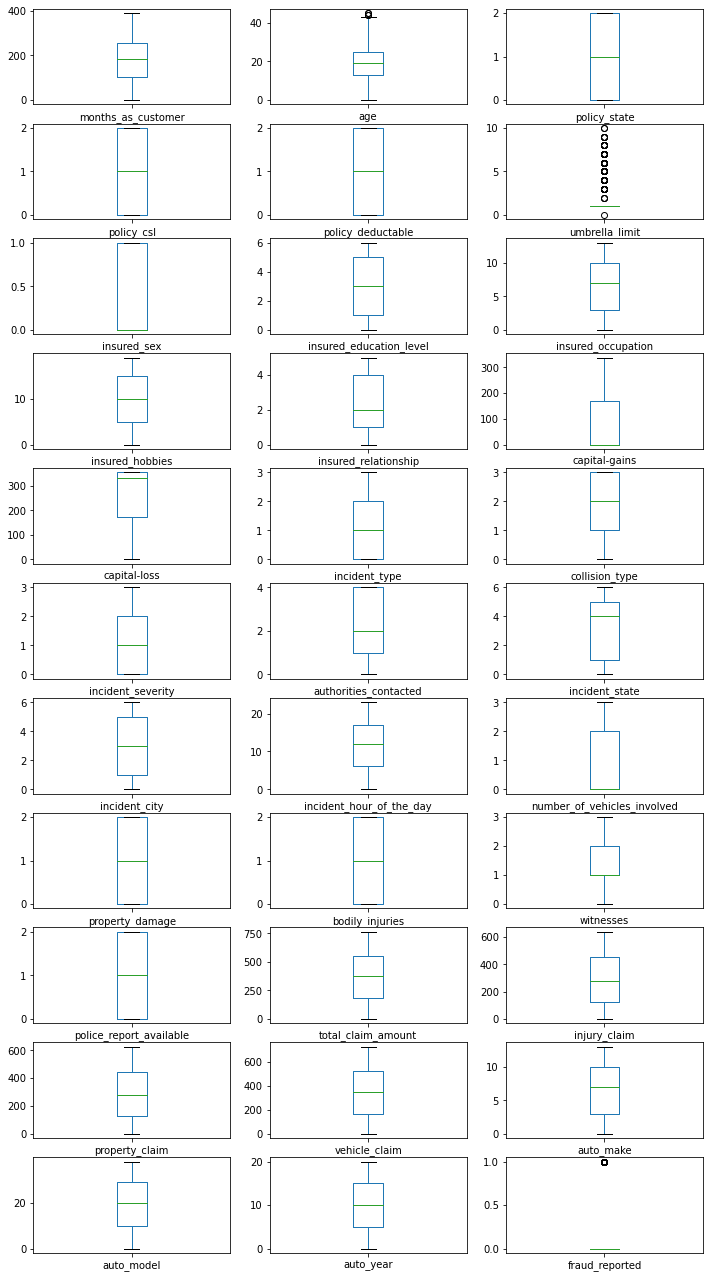

In [39]:
df.plot(kind='box',subplots=True,layout=(12,3),figsize=(12,25))
plt.show()

as we can see that, outliers are near to negligible in the dataset. very few there in few columns.

# Applying zscore

In [40]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(1000, 33)

In [41]:
threshold=3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 262, 314, 430, 458, 503, 657, 700, 875,
       922, 975], dtype=int32), array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int32))


In [42]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(1000, 33)
(985, 33)


as we can see that very few outliers are presnt, we are not dropping that.

In [43]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_make                      0
auto_model

no null values are present in the dataset.

Now we are going to split the feature column and target column.

In [44]:
x = df.drop(['fraud_reported'],axis=1)
y = df['fraud_reported']

# Checking skewness

In [45]:
x.skew()

months_as_customer             0.092231
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.063505
umbrella_limit                 1.936066
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.894996
capital-loss                  -0.810352
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.106418
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.052967


skewness is acceptable

# Standard Scaling

In [46]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
k=sc.fit_transform(x)
x=pd.DataFrame(k,columns = x.columns)

In [47]:
x.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,1.148951,0.990836,1.187173,0.060937,0.043487,-0.469668,1.076953,0.530931,-1.158316,1.281737,-1.437957,0.988675,0.826993,0.766005,1.254675,-1.260614,1.196963,0.351762,-0.962196,-0.956261,-0.823865,1.303656,0.009759,0.461838,1.270313,0.892833,-0.164277,1.226337,0.945226,0.856466,-1.645743,-0.183440
1,0.277600,0.334073,-0.016856,0.060937,1.285962,1.617746,1.076953,0.530931,-0.162558,0.929078,-0.247595,-0.787740,0.826993,1.691132,-1.566933,-0.195906,1.196963,0.815829,0.995476,-0.524475,-0.823865,-1.160722,-1.210174,-1.338700,-1.198712,-1.487505,-1.285912,-1.327278,-1.477132,0.360539,-0.657470,0.315491
2,-0.613781,-1.088913,1.187173,-1.182668,1.285962,1.617746,-0.928546,1.557877,1.082141,-1.363201,0.347586,-0.189269,0.826993,-1.084249,0.314139,-0.195906,1.196963,-1.040437,-0.962196,-0.668404,1.140056,0.071467,1.229693,1.362107,0.035801,-1.033452,0.253691,-1.004659,-1.104462,-0.631315,0.959702,0.315491
3,0.548019,0.224613,-1.220886,0.060937,1.285962,2.139600,-0.928546,1.557877,-1.407256,-1.363201,0.942766,0.665690,-1.470135,0.766005,-0.626397,-1.260614,1.196963,-0.576371,-1.451614,-0.956261,-0.823865,-1.160722,0.009759,0.461838,0.035801,0.379157,-0.233057,-0.211781,0.830559,-0.879279,1.319074,1.479664
4,0.277600,0.552994,-1.220886,1.304542,0.043487,2.139600,1.076953,-1.522961,1.082141,-1.363201,0.942766,1.729640,-0.452192,1.691132,-1.566933,-0.195906,-0.109052,-1.040437,-1.451614,1.202666,-0.823865,0.071467,-1.210174,-0.438431,0.035801,-1.317808,-1.158935,-1.376492,-1.343353,-1.623169,1.049545,0.648112


In [48]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int32

In [49]:
x.shape,y.shape

((1000, 32), (1000,))

# Modeling

In [62]:
#models froms sickit learn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score

##ensemble technique
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


#Importing some metrics we can use to evaluate our model performance.... 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score,auc
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [63]:
maxacc=0
maxrs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is',maxacc,'on random state', maxrs)

Best accuracy is 0.8166666666666667 on random state 18


We are getting best result at random state 18 i.e 82%

In [64]:
#spliting train and test data at random state 115
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=18)

In [65]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((700, 32), (300, 32), (700,), (300,))

Different models for modelling performance-

In [66]:
LR=LogisticRegression()
GNB=GaussianNB()
RF=RandomForestClassifier()
ADA=AdaBoostClassifier()
KNN=KNeighborsClassifier()
DTC=DecisionTreeClassifier()
SVC=SVC()

In [67]:
model=[LR,GNB,RF,ADA,KNN,DTC,SVC]



****************** LogisticRegression() *******************


accuracy score: LogisticRegression()
0.8166666666666667
[[219  13]
 [ 42  26]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       232
           1       0.67      0.38      0.49        68

    accuracy                           0.82       300
   macro avg       0.75      0.66      0.69       300
weighted avg       0.80      0.82      0.80       300

Cross Validation Score: 0.7689999999999999


auc score: 0.663159229208925


roc_auc_score =  0.663159229208925


AxesSubplot(0.125,0.808774;0.62x0.0712264)





****************** GaussianNB() *******************


accuracy score: GaussianNB()
0.7733333333333333
[[198  34]
 [ 34  34]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       232
           1       0.50      0.50      0.50        68

    accuracy                           0.77       300
   macro avg       0.68   

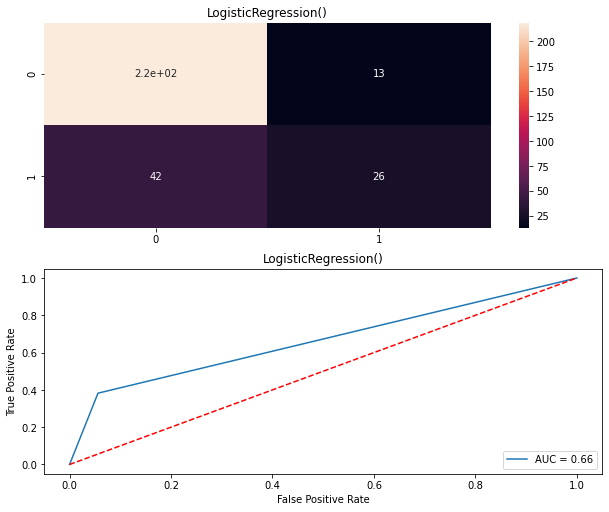

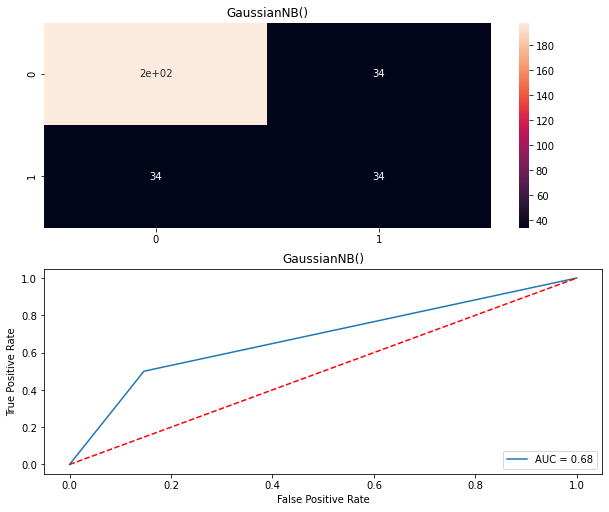

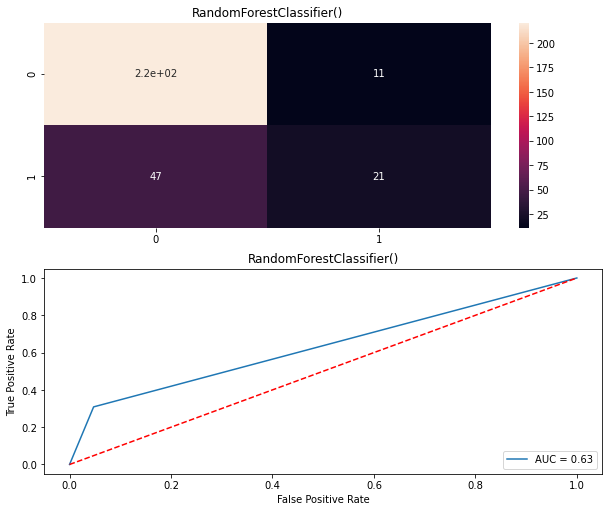

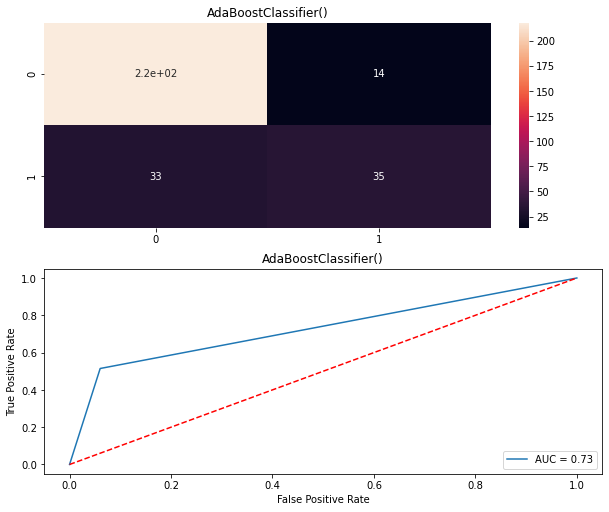

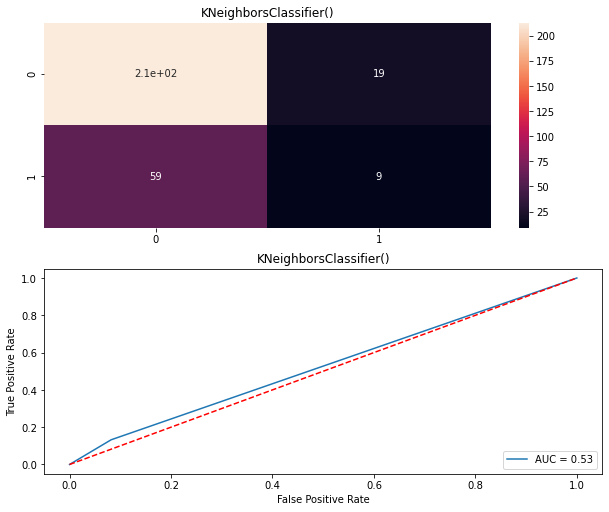

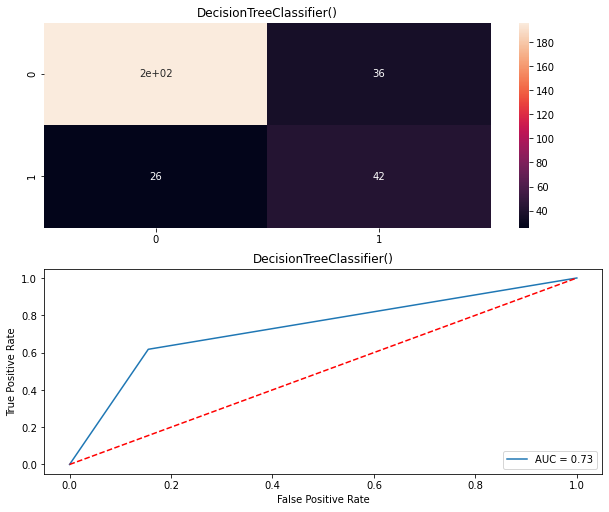

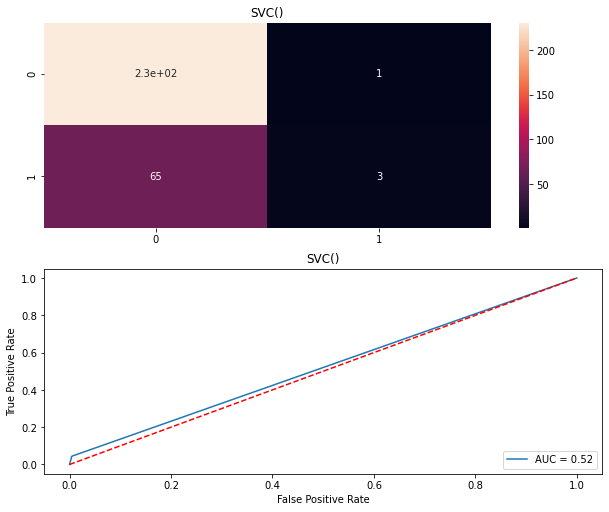

In [68]:
score=[]
cvs=[]
rocscore=[]
for i in model:
    print('\n')
    print('******************',i,'*******************')
    print('\n')
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    
    print('accuracy score:',i)
    score=accuracy_score(y_test,pred)
    print(score)
    
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print(classification_report(y_test,pred))
    
    cross=cross_val_score(i, x, y, cv=5, scoring='accuracy').mean()
    print('Cross Validation Score:',cross)
    cvs.append(cross)
    print('\n')
    
    print('auc score:',roc_auc_score(y_test,pred))
    print('\n')
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(i)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(i)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

# AdaBoost Classifier is performing best for our data set with accuracy of 84%, cross validation score of 81%, auc score of 73%.

# Hyper Paramter Tuning

In [69]:
#parameter list of AdaBoost Classifier

from sklearn.model_selection import GridSearchCV

parameters={'n_estimators':[100,200,300],'learning_rate':[0.001,0.01,0.1,1]}
GCV=GridSearchCV(ADA,parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'n_estimators': [100, 200, 300]})

checking the best paramter

In [70]:
GCV.best_params_

{'learning_rate': 0.001, 'n_estimators': 100}

In [71]:
predgcv=GCV.best_estimator_.predict(x_test)

In [72]:
print('Accuracy score:')
print(accuracy_score(y_test,predgcv))
print(confusion_matrix(y_test,predgcv))
print(classification_report(y_test,predgcv))
cvs_score=cross_val_score(GCV.best_estimator_, x, y, cv=10,scoring='accuracy')
print('Cross Validation Score:',score.mean())
print('auc score:',roc_auc_score(y_test,predgcv))

Accuracy score:
0.8466666666666667
[[204  28]
 [ 18  50]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       232
           1       0.64      0.74      0.68        68

    accuracy                           0.85       300
   macro avg       0.78      0.81      0.79       300
weighted avg       0.86      0.85      0.85       300

Cross Validation Score: 0.78
auc score: 0.8073022312373226


As we can see most like,results are with accuracy and cvs score, but slightly good increse in auc score with 81

Text(0.5, 0, 'False Positive Rate')

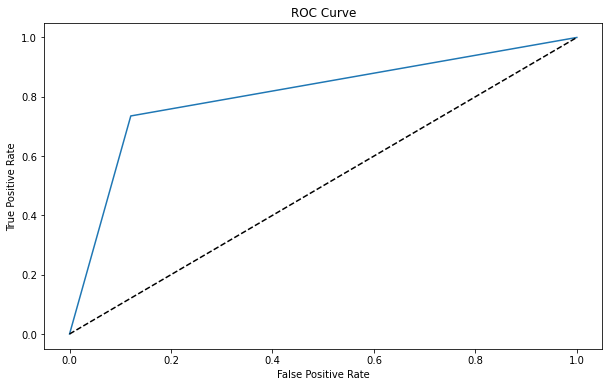

In [73]:
y_pred_prob=GCV.best_estimator_.predict_proba(x_test)[:,1]
    
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_prob)

plt.figure(figsize=(10,6))
plt.title("ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, label='ADA Boost classifier')
plt.plot([0,1],[0,1],'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

We can see our model is performing good by seeing the area covered under the curve, with auc score of 81.

# Model Saving

In [74]:
#import joblib
#joblib.dump(ADA,'Insurance_fraud_detection_ADA.obj')

# Completed-->>